In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [104]:
import matplotlib.image as mpimg
from collections import Counter

In [105]:
data = pd.read_csv('../FeatureEng/seller_prd_customer.csv')
data.head()
data.info()
data.describe()
data = data.drop(columns = ['Unnamed: 0'])
data.head()
data.order_status.unique()
data['order_status'].value_counts()
data['order_id'].value_counts().head(50)
data['customer_id'].value_counts().head(50)
data.order_item_id.unique()
data['order_item_id'].value_counts()
product_cat = list(data.product_category_name_english.unique())
data['customer_city'].value_counts()
data['customer_state'].value_counts()
len(data.seller_id.unique())
list_count = data['seller_id'].value_counts()


#print(list_count.head(197))
count = Counter()
for i in list_count:
    count[i]+=1
    
list_names = data['seller_id'].value_counts()>=120
seller_id_final = list_names.keys()
seller_id_final = seller_id_final[:196]

data_new = data.loc[data['seller_id'].isin(seller_id_final)]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109257 entries, 0 to 109256
Data columns (total 32 columns):
Unnamed: 0                       109257 non-null int64
order_id                         109257 non-null object
customer_id                      109257 non-null object
order_status                     109257 non-null object
order_purchase_timestamp         109257 non-null object
order_approved_at                109257 non-null object
order_delivered_carrier_date     109257 non-null object
order_delivered_customer_date    109257 non-null object
order_estimated_delivery_date    109257 non-null object
order_item_id                    109257 non-null int64
product_id                       109257 non-null object
seller_id                        109257 non-null object
shipping_limit_date              109257 non-null object
price                            109257 non-null float64
freight_value                    109257 non-null float64
seller_zip_code_prefix           109257 non-null 

In [106]:
data_seller = data_new.groupby('seller_id')['product_category_name_english'].value_counts()
data_seller_df = pd.DataFrame(data=data_seller)
column = ['seller_id','product_category','sales/category per seller']
data_seller_df.rename(columns={'seller_id':'seller_id','product_category_name_english':'product_category','product_category_name_english':'sales/category per seller'},inplace=True)
data_seller_df.head()

sales/category per seller
seller_id                        product_category_name_english                               
001cca7ae9ae17fb1caed9dfb1094831 garden_tools                                             207
                                 construction_tools_construction                           27
004c9cd9d87a3c30c522c48c4fc07416 bed_bath_table                                           162
00ee68308b45bc5e2660cd833c3f81cc bed_bath_table                                           151
                                 furniture_mattress_and_upholstery                         22

In [107]:
data_new.groupby('seller_id')['product_category_name_english'].value_counts().sort_values(ascending=False).head(20)

seller_id                         product_category_name_english
1f50f920176fa81dab994f9023523100  garden_tools                     1886
6560211a19b47992c3666cc44a7e94c0  watches_gifts                    1600
4a3ca9315b744ce9f8e9374361493884  bed_bath_table                   1559
1025f0e2d44d7041d6cf58b6550e0bfa  furniture_decor                  1297
da8622b14eb17ae2831f4ac5b9dab84a  bed_bath_table                   1297
7c67e1448b00f6e969d365cea6b010ab  office_furniture                 1234
ea8482cd71df3c1969d7b9473ff13abc  telephony                        1163
cc419e0650a3c5ba77189a1882b7556a  health_beauty                    1086
7a67c85e85bb2ce8582c35f2203ad736  cool_stuff                       1055
4869f7a5dfa277a7dca6462dcf3b52b2  watches_gifts                     995
8b321bb669392f5163d04c59e235e066  electronics                       898
3d871de0142ce09b7081e2b9d1733cb1  stationery                        824
cc419e0650a3c5ba77189a1882b7556a  perfumery                         646


In [108]:
# Trying to split data based on year as well as month
data_new['transaction_year'] = pd.DatetimeIndex(data_new['order_purchase_timestamp']).year
data_new['transaction_month'] = pd.DatetimeIndex(data_new['order_purchase_timestamp']).month
data_new['transaction_date'] = pd.DatetimeIndex(data_new['order_purchase_timestamp']).day
data_new['Bi-Weekly'] = np.where(data_new['transaction_date']<15,1,0)
#data_new['Bi-Weekly'] = data_new['transaction_month'].astype(str)  + '_' + data_new['Bi-Weekly']

data_new['Bi-Weekly']= (2*data_new['transaction_month']-1) - data_new['Bi-Weekly']
#data_new[data_new['transaction_date'] < 15,"Bi-Weekly"] = 0
#data_new[data_new['transaction_date'] >= 15,"Bi-Weekly"] = 1
data_new.head(10)

C:\Users\user\Anaconda3\envs\fb_prophet\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\user\Anaconda3\envs\fb_prophet\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\user\Anaconda3\envs\fb_prophet\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_score,datediff_purchase_deliver,transaction_year,transaction_month,transaction_date,Bi-Weekly
9,234e664f4418bb97ea8f387244a9538f,98e164b3750e0b9e0eddb3612fb8d617,delivered,5/22/17 12:59,5/22/17 13:15,5/24/17 9:34,5/26/17 14:41,6/2/17 0:00,1,b00a32a0b42fd65efb58a5822009f629,...,de166e0e5846bcc902deba22ef24bd77,4757,sao paulo,SP,5,4 days 00:00:00.000000000,2017,5,22,9
10,fd54e2afe76bb472b26d47b2aea174d5,ce3e4ad9d1fd077a56f53f547205b1a7,delivered,7/13/17 9:42,7/13/17 9:55,7/14/17 16:25,7/17/17 18:17,8/4/17 0:00,1,b00a32a0b42fd65efb58a5822009f629,...,3788240ca725fbd60d785d4b888b8adb,83602,campo largo,PR,5,4 days 00:00:00.000000000,2017,7,13,12
11,3a93b4a83b7cfce5720745425c43a856,53859b5bd7c22aaae15b7482acfa1bc8,delivered,7/10/17 10:51,7/12/17 2:24,7/14/17 16:37,7/18/17 16:52,7/25/17 0:00,1,b00a32a0b42fd65efb58a5822009f629,...,d9e383531c1acbe6239248fcd5045f92,18090,sorocaba,SP,4,8 days 00:00:00.000000000,2017,7,10,12
12,c8b8a114e6f6e79082614222a75d0353,53b13fa2d20d9011a49a2751c95433a9,delivered,6/1/17 12:46,6/3/17 2:22,6/6/17 13:48,6/13/17 9:17,6/22/17 0:00,1,b00a32a0b42fd65efb58a5822009f629,...,61439e840fe1e7216ada4f256239967c,18125,aluminio,SP,1,12 days 00:00:00.000000000,2017,6,1,10
27,7badee5c2f143381b7002bfbba9037b8,7a95f1b494f0062025b63b3193421690,delivered,6/14/17 13:40,6/15/17 3:10,6/16/17 14:38,6/22/17 17:33,7/7/17 0:00,1,725cbfcaff95a4d43742fdf13cf43c75,...,279d9065b859d2c9caf96ce8b2d0c929,84061,ponta grossa,PR,5,8 days 00:00:00.000000000,2017,6,14,10
28,bffb2f663c0ea51622bccd351e2815d8,b3dad37a7ed6c67056ababa4a4deff4d,delivered,5/19/17 13:06,5/19/17 13:22,5/22/17 10:16,5/23/17 12:42,6/1/17 0:00,1,725cbfcaff95a4d43742fdf13cf43c75,...,d0886880ad8e1bb53c74aa0923b0d0cb,6170,osasco,SP,5,4 days 00:00:00.000000000,2017,5,19,9
29,ebb8082fe1a85f69ce8b2f708d07a910,eacf8d981b61b119a75afa34a977b271,delivered,5/22/17 12:06,5/22/17 13:05,5/24/17 9:34,5/31/17 12:31,6/13/17 0:00,1,725cbfcaff95a4d43742fdf13cf43c75,...,5491dee0f317e6d8d4dc76ece4eeeb73,31230,belo horizonte,MG,5,9 days 00:00:00.000000000,2017,5,22,9
30,56dcbf1c8f148732f46bb1770568aa5d,3a6d58dbca99e1b8ef6177a10d451ac5,delivered,5/19/17 16:16,5/19/17 16:25,5/24/17 7:36,6/2/17 16:33,6/23/17 0:00,1,725cbfcaff95a4d43742fdf13cf43c75,...,d7f925384467e3c256086de7392ac08b,60871,fortaleza,CE,1,14 days 00:00:00.000000000,2017,5,19,9
31,106f6c512adbf8efc43791f75692d25c,ad63c8822d109e745e032497a5fffd68,delivered,5/17/17 12:16,5/17/17 13:05,5/18/17 9:46,5/23/17 10:24,6/6/17 0:00,1,725cbfcaff95a4d43742fdf13cf43c75,...,ff70aa1b53f643263ead50eed3166164,13574,sao carlos,SP,4,6 days 00:00:00.000000000,2017,5,17,9
49,bacc701eec298cb5520f251e863cde03,ca559371b1efa6b4733abba1c71494c9,delivered,6/1/17 10:48,6/1/17 11:03,6/2/17 9:19,6/9/17 18:42,6/26/17 0:00,1,5a419dbf24a8c9718fe522b81c69f61a,...,3ef848190859d1383be83ef97ae6fedd,31310,belo horizonte,MG,5,8 days 00:00:00.000000000,2017,6,1,10


In [109]:
# Try taking count of product categories sold in monthly sales

data_new_count=data_new.groupby(['product_category_name_english','transaction_year','transaction_month']).size().reset_index(name='count')
print(data_new_count.head(10))

  product_category_name_english  transaction_year  transaction_month  count
0    agro_industry_and_commerce              2017                  1      3
1    agro_industry_and_commerce              2017                  2      6
2    agro_industry_and_commerce              2017                  3      2
3    agro_industry_and_commerce              2017                  5      2
4    agro_industry_and_commerce              2017                  8      4
5    agro_industry_and_commerce              2017                 10      1
6    agro_industry_and_commerce              2018                  1      1
7    agro_industry_and_commerce              2018                  2      1
8    agro_industry_and_commerce              2018                  3     10
9    agro_industry_and_commerce              2018                  5      1


In [110]:
# Try taking count of product categories sold in Bi-Weekly sales

data_new_count_weekly=data_new.groupby(['product_category_name_english','transaction_year','Bi-Weekly']).size().reset_index(name='count')
print(data_new_count_weekly.head(10))

  product_category_name_english  transaction_year  Bi-Weekly  count
0    agro_industry_and_commerce              2017          1      3
1    agro_industry_and_commerce              2017          2      3
2    agro_industry_and_commerce              2017          3      3
3    agro_industry_and_commerce              2017          5      2
4    agro_industry_and_commerce              2017          8      1
5    agro_industry_and_commerce              2017          9      1
6    agro_industry_and_commerce              2017         15      4
7    agro_industry_and_commerce              2017         18      1
8    agro_industry_and_commerce              2018          1      1
9    agro_industry_and_commerce              2018          2      1


In [111]:
list_of_prod_cat=list(data_new_count.product_category_name_english.unique())
print(list_of_prod_cat)

['agro_industry_and_commerce', 'air_conditioning', 'art', 'audio', 'auto', 'baby', 'bed_bath_table', 'books_general_interest', 'cds_dvds_musicals', 'christmas_supplies', 'cine_photo', 'computers', 'computers_accessories', 'consoles_games', 'construction_tools_construction', 'construction_tools_lights', 'construction_tools_safety', 'cool_stuff', 'costruction_tools_garden', 'costruction_tools_tools', 'diapers_and_hygiene', 'drinks', 'dvds_blu_ray', 'electronics', 'fashio_female_clothing', 'fashion_bags_accessories', 'fashion_childrens_clothes', 'fashion_male_clothing', 'fashion_shoes', 'fashion_sport', 'fixed_telephony', 'food', 'food_drink', 'furniture_decor', 'furniture_living_room', 'furniture_mattress_and_upholstery', 'garden_tools', 'health_beauty', 'home_appliances', 'home_appliances_2', 'home_comfort_2', 'home_confort', 'home_construction', 'housewares', 'industry_commerce_and_business', 'kitchen_dining_laundry_garden_furniture', 'luggage_accessories', 'market_place', 'music', 'mu

In [112]:
data_new_count[(data_new_count['product_category_name_english']==list_of_prod_cat[0])]

,product_category_name_english,transaction_year,transaction_month,count
0,agro_industry_and_commerce,2017,1,3
1,agro_industry_and_commerce,2017,2,6
2,agro_industry_and_commerce,2017,3,2
3,agro_industry_and_commerce,2017,5,2
4,agro_industry_and_commerce,2017,8,4
5,agro_industry_and_commerce,2017,10,1
6,agro_industry_and_commerce,2018,1,1
7,agro_industry_and_commerce,2018,2,1
8,agro_industry_and_commerce,2018,3,10
9,agro_industry_and_commerce,2018,5,1


In [113]:
data_new_count_weekly[(data_new_count_weekly['product_category_name_english']==list_of_prod_cat[0])]

,product_category_name_english,transaction_year,Bi-Weekly,count
0,agro_industry_and_commerce,2017,1,3
1,agro_industry_and_commerce,2017,2,3
2,agro_industry_and_commerce,2017,3,3
3,agro_industry_and_commerce,2017,5,2
4,agro_industry_and_commerce,2017,8,1
5,agro_industry_and_commerce,2017,9,1
6,agro_industry_and_commerce,2017,15,4
7,agro_industry_and_commerce,2017,18,1
8,agro_industry_and_commerce,2018,1,1
9,agro_industry_and_commerce,2018,2,1


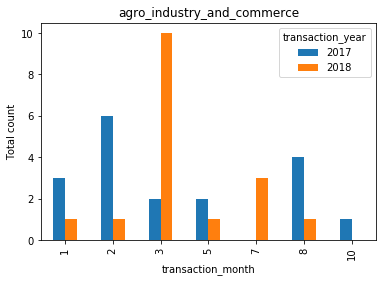

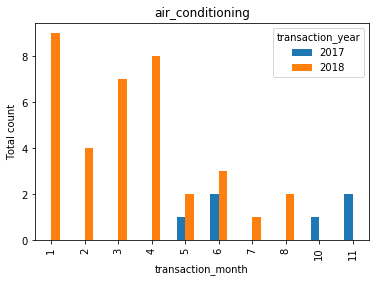

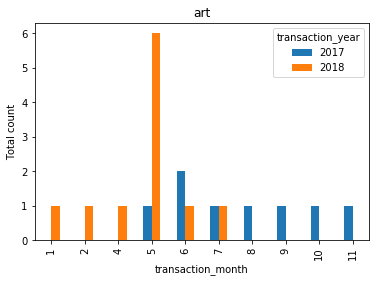

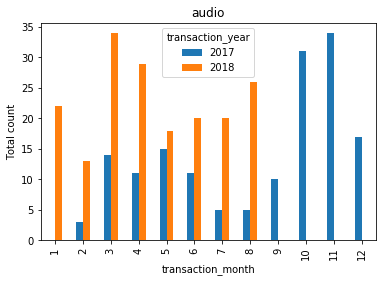

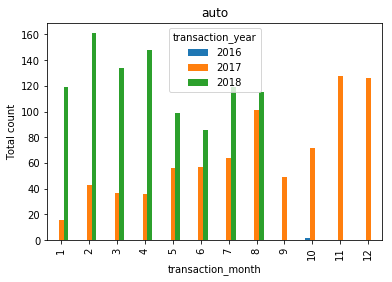

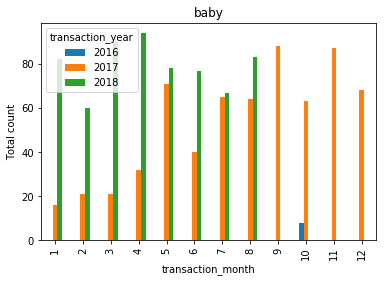

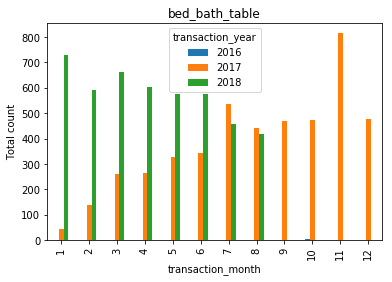

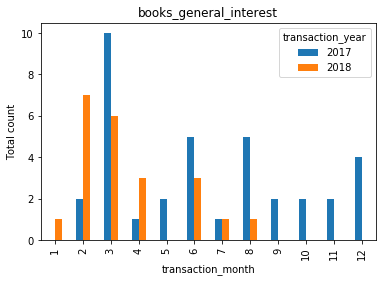

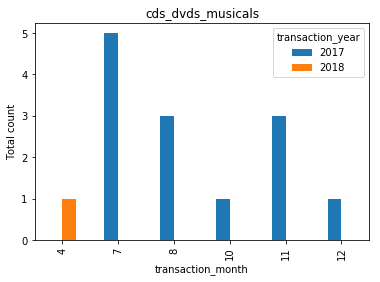

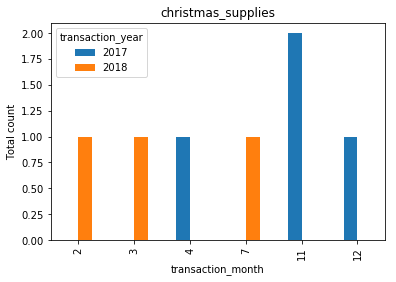

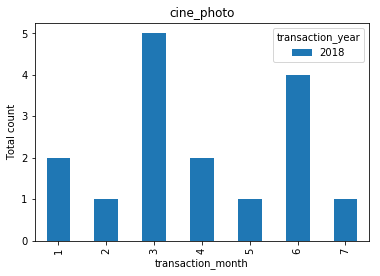

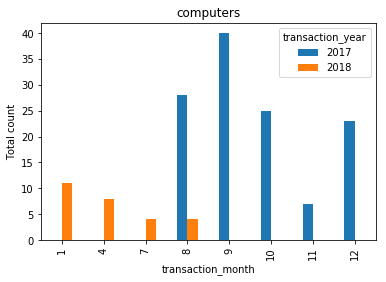

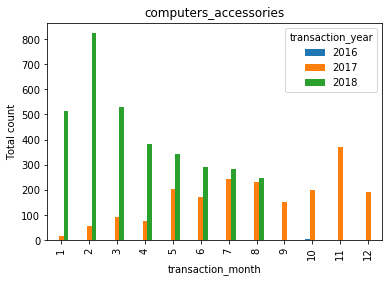

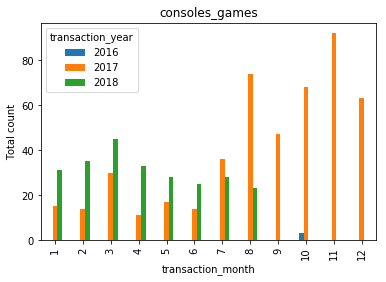

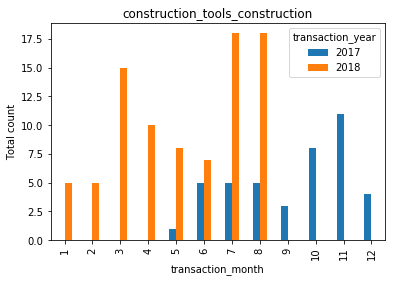

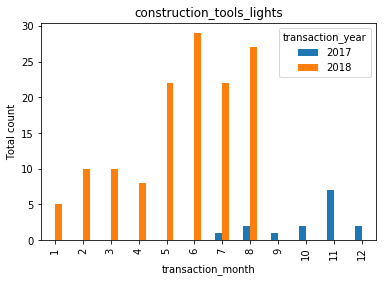

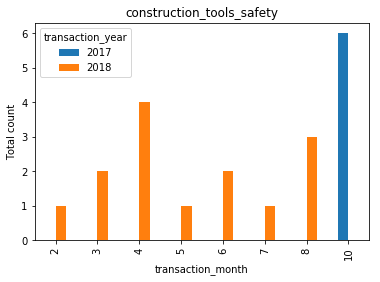

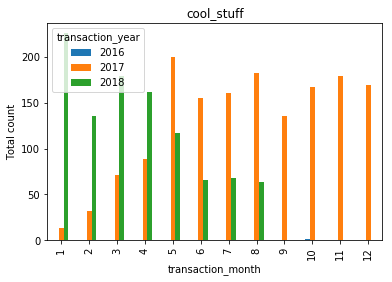

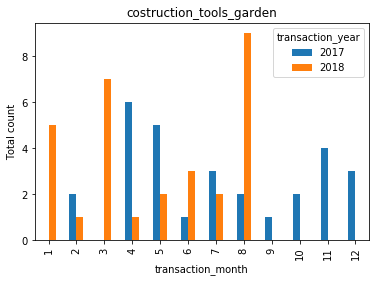

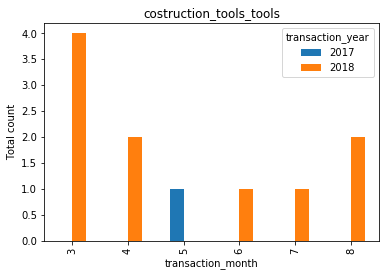

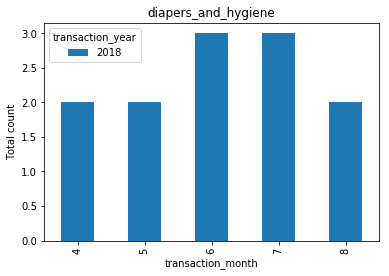

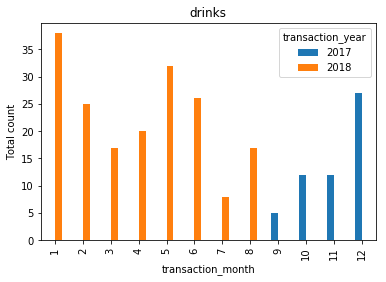

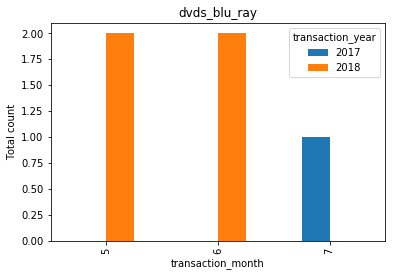

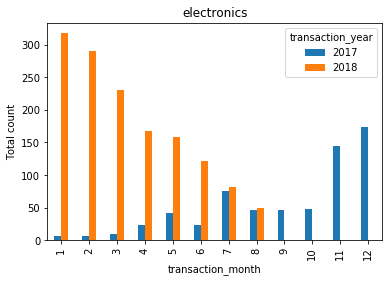

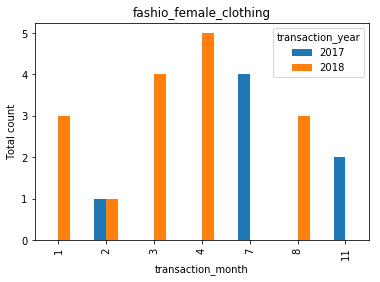

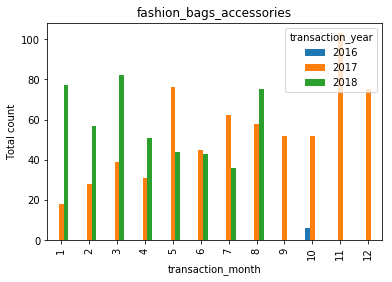

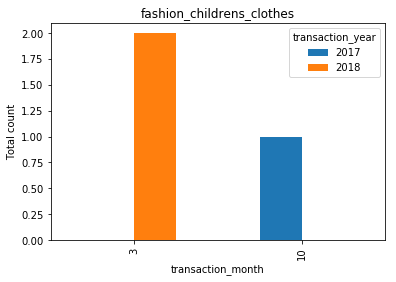

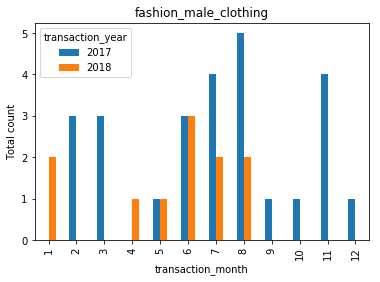

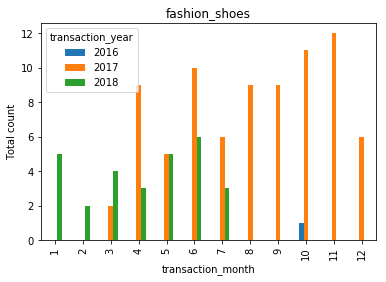

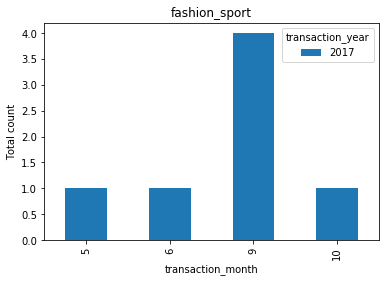

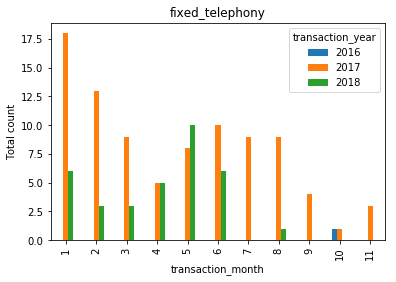

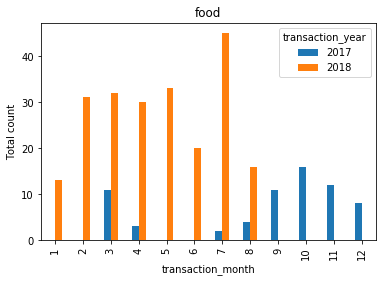

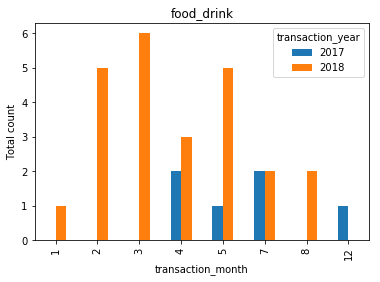

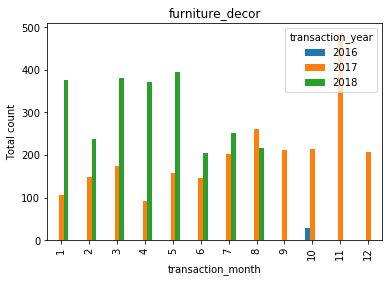

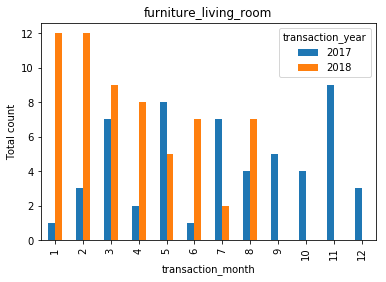

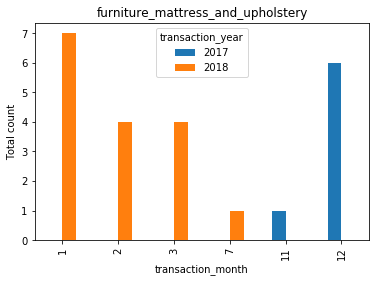

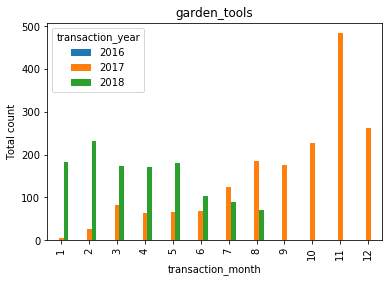

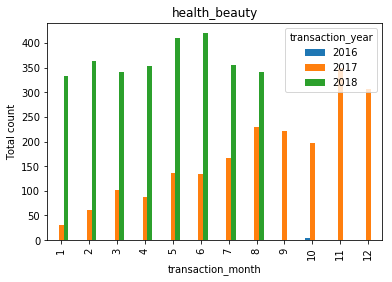

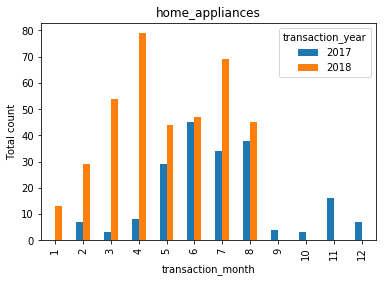

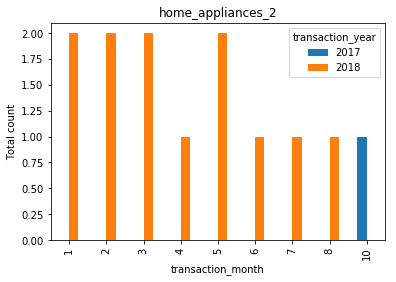

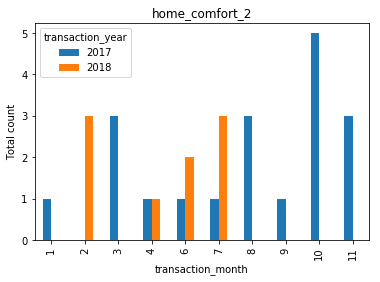

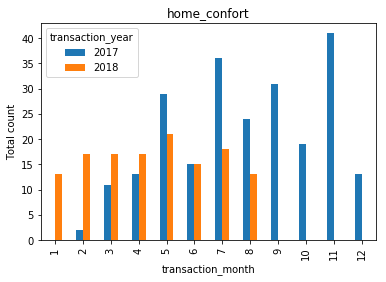

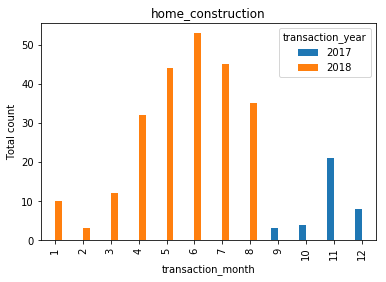

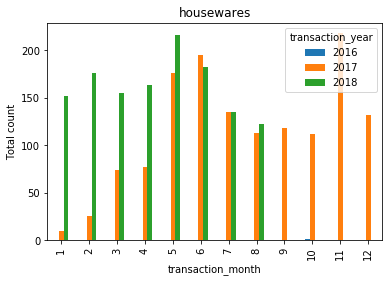

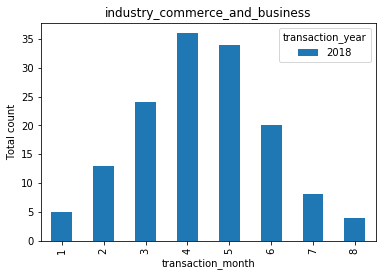

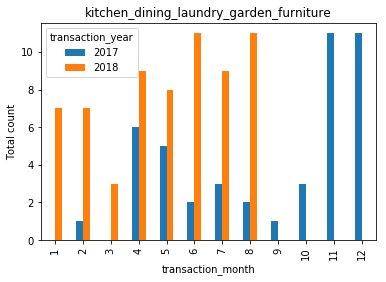

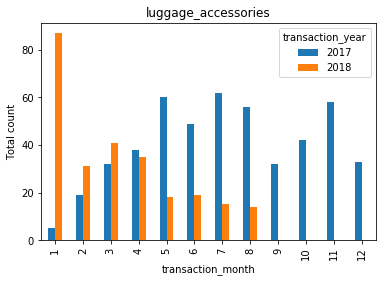

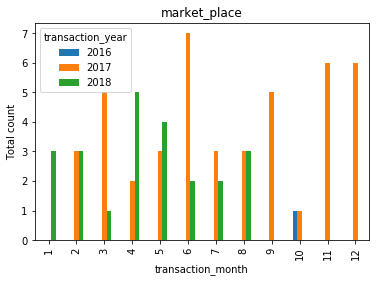

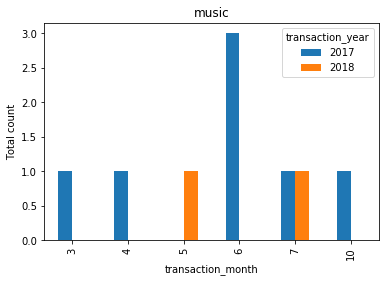

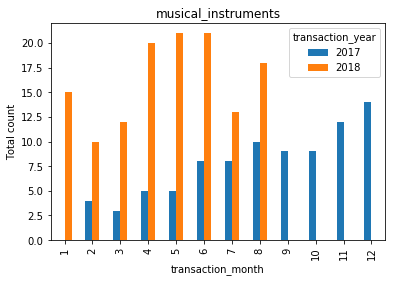

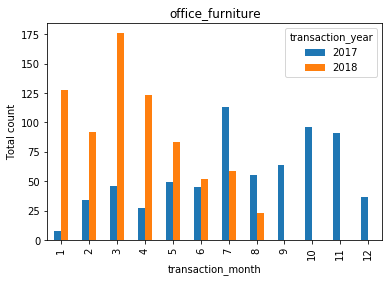

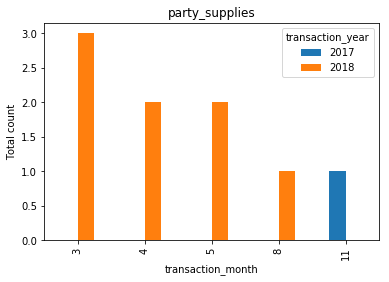

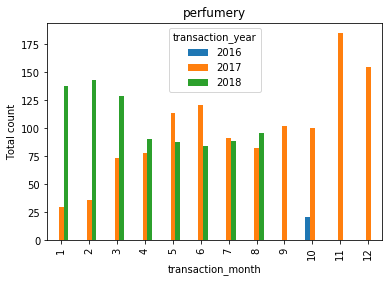

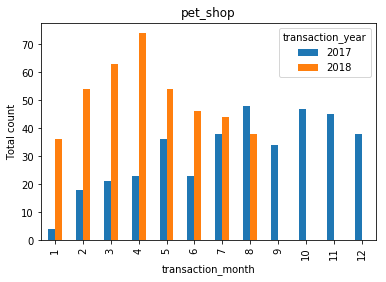

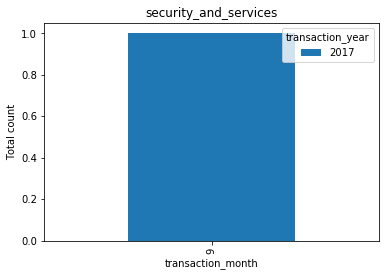

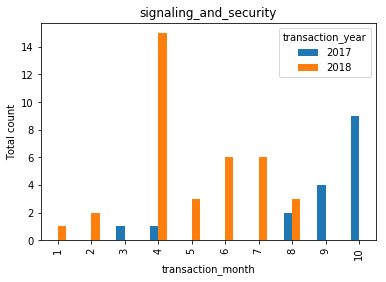

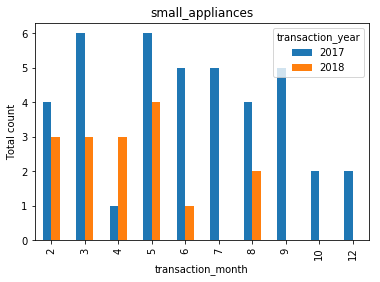

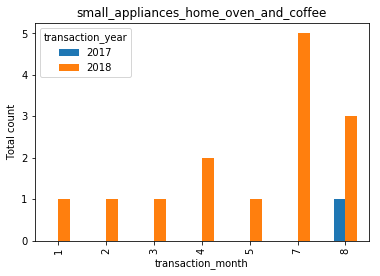

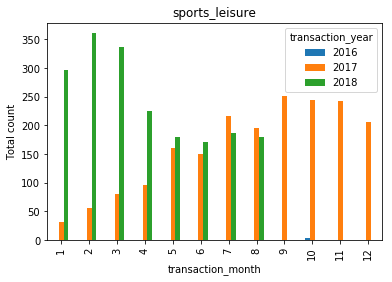

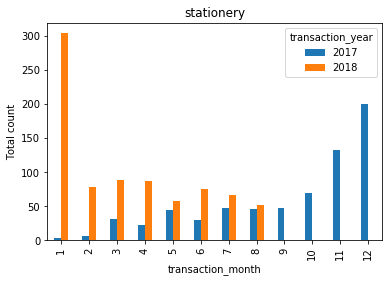

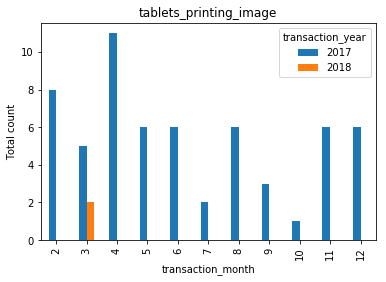

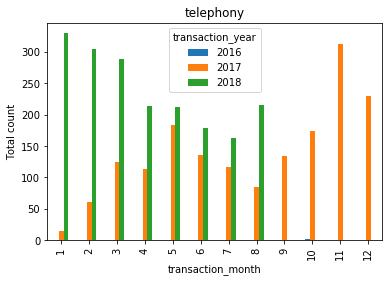

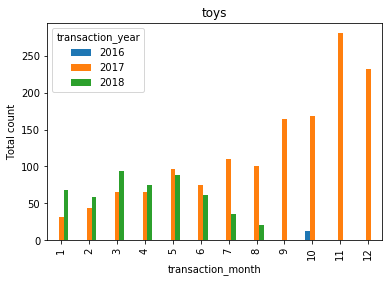

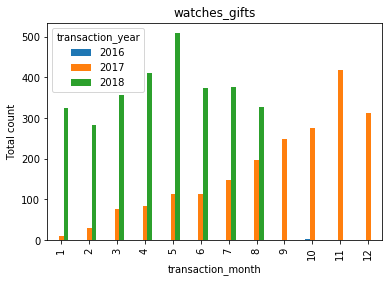

In [114]:
for i in range(len(list_of_prod_cat)):
    data_new_count[(data_new_count['product_category_name_english']==list_of_prod_cat[i])].pivot("transaction_month", "transaction_year", "count").plot(kind='bar')
    plt.title(list_of_prod_cat[i])
    plt.ylabel("Total count")
    plt.subplot()


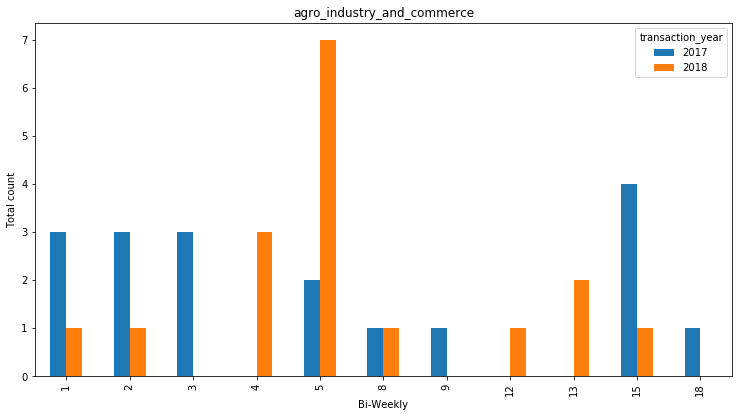

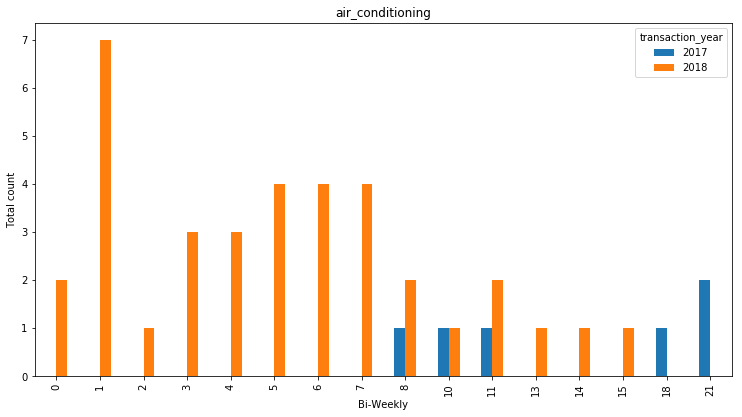

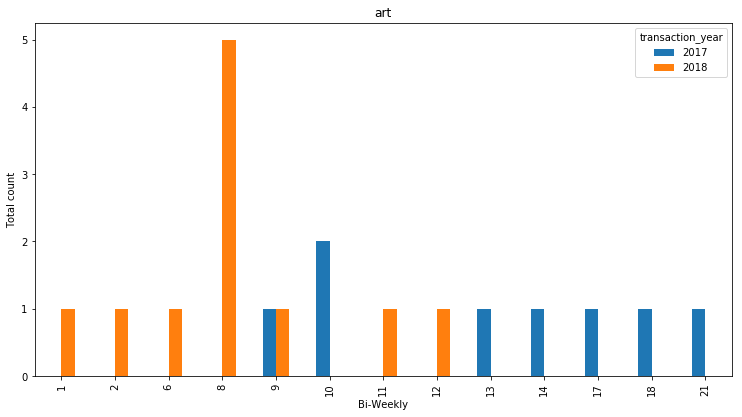

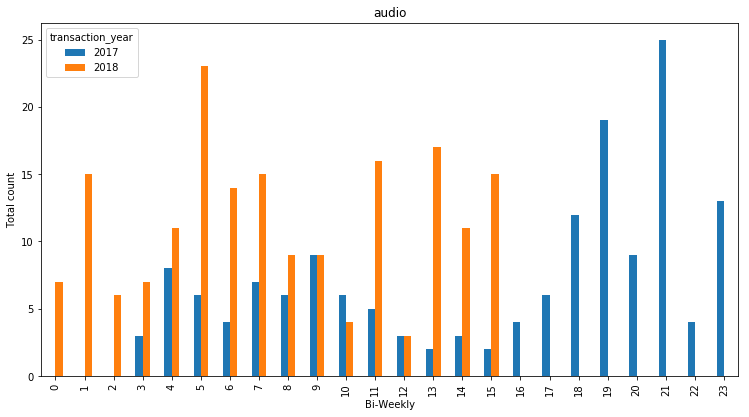

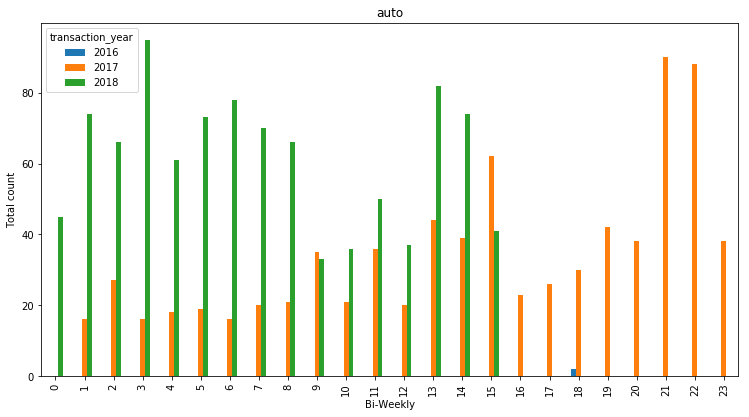

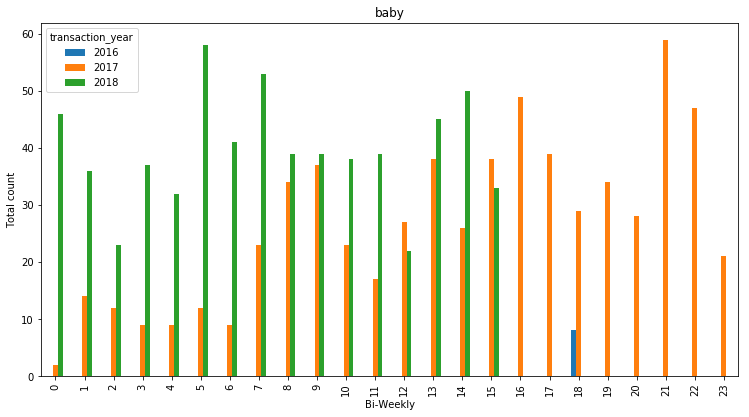

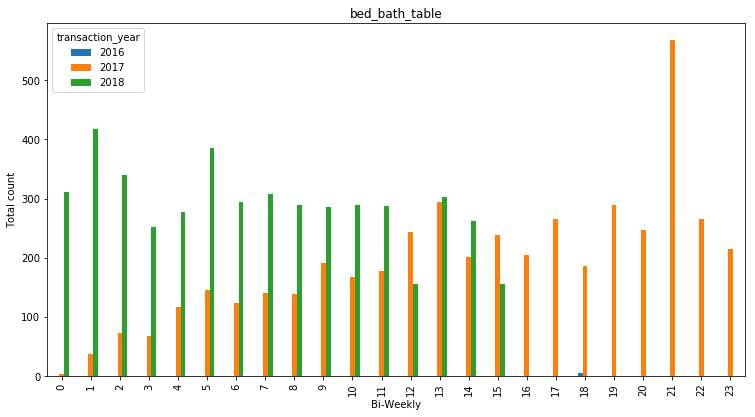

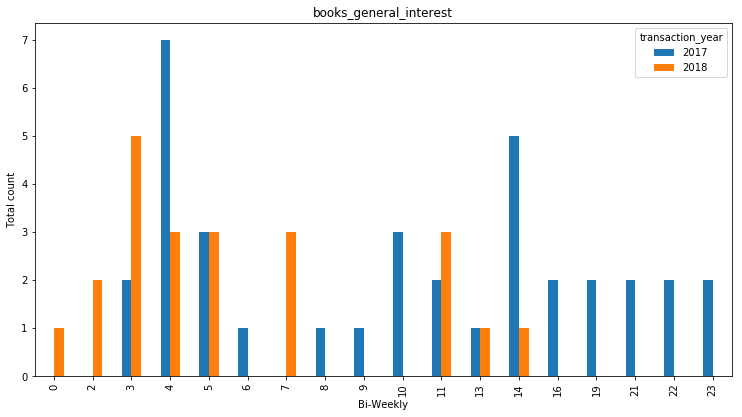

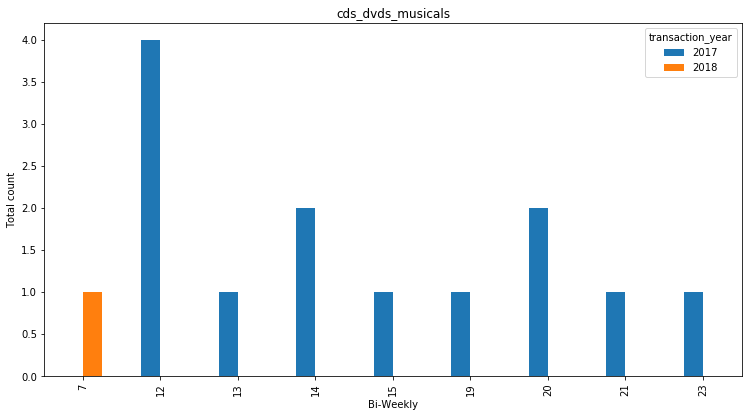

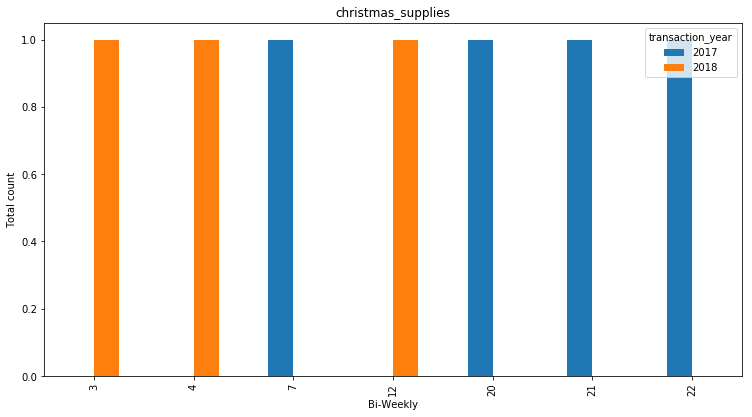

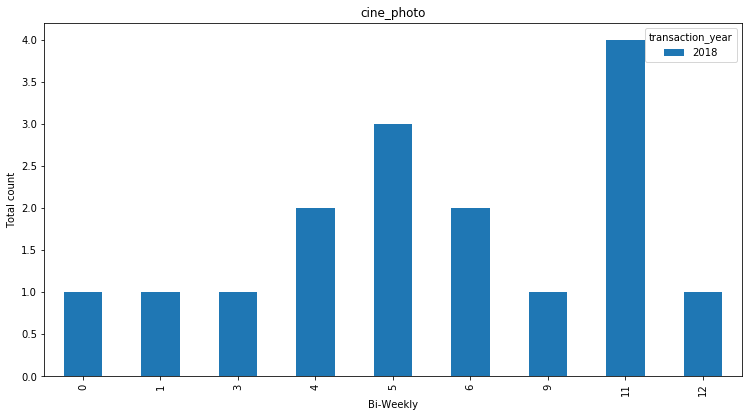

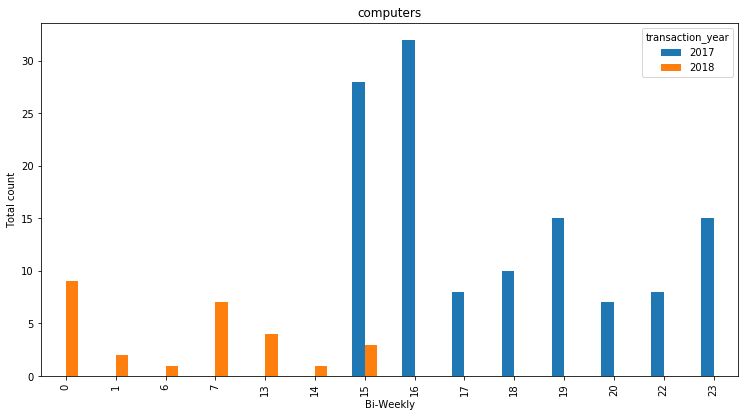

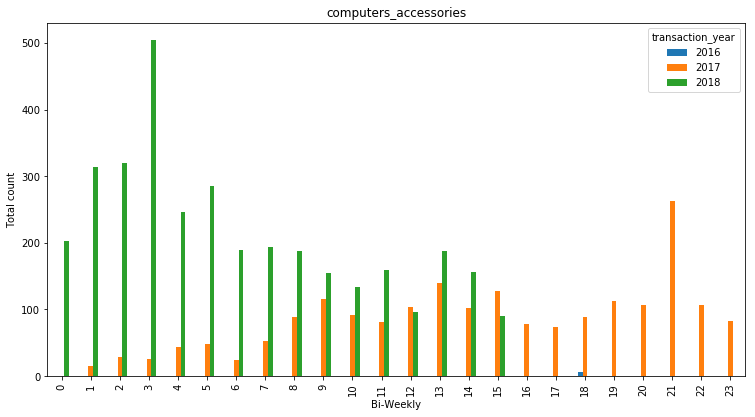

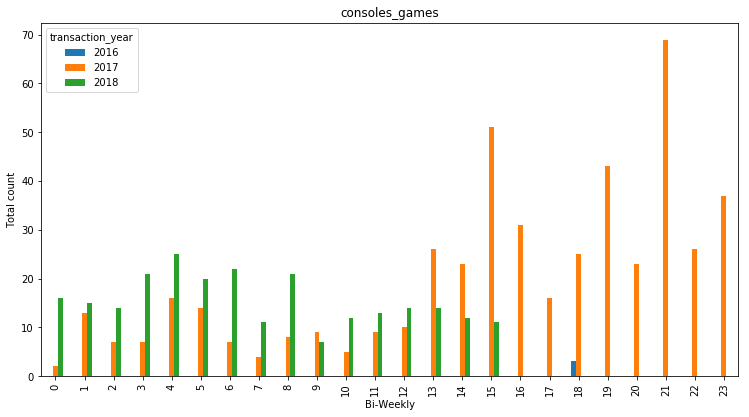

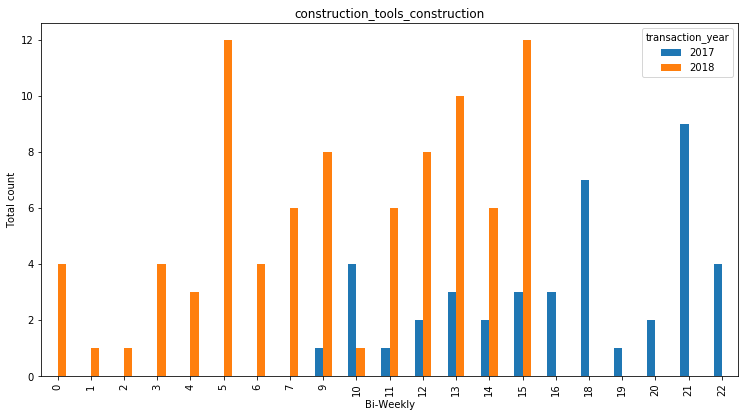

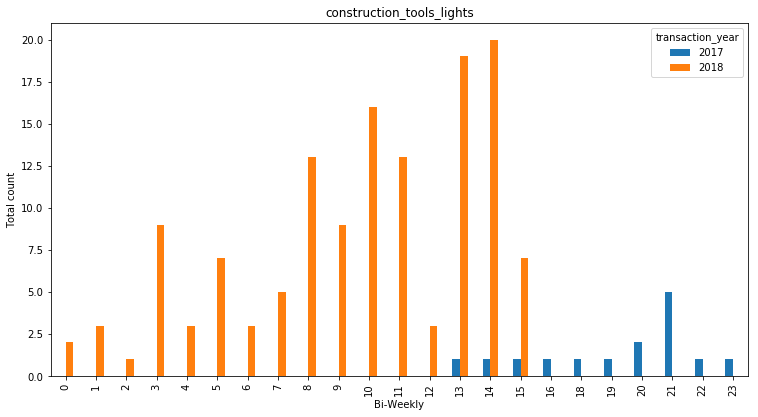

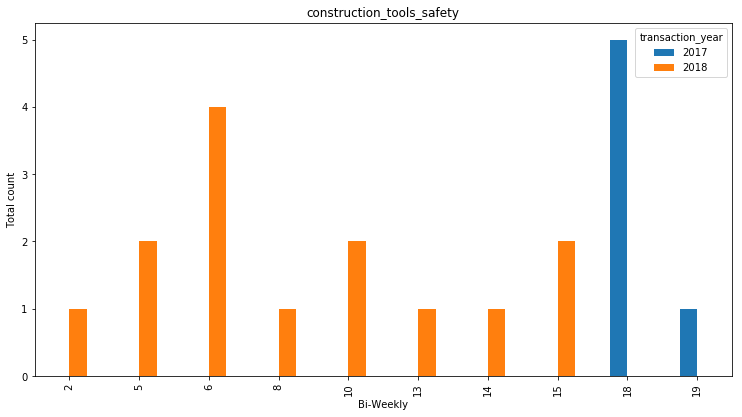

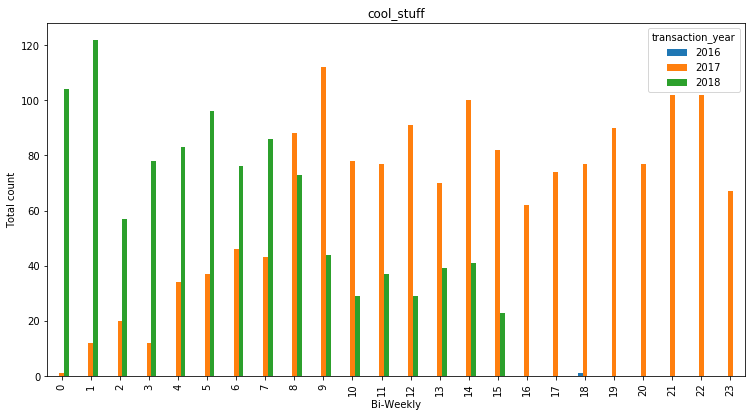

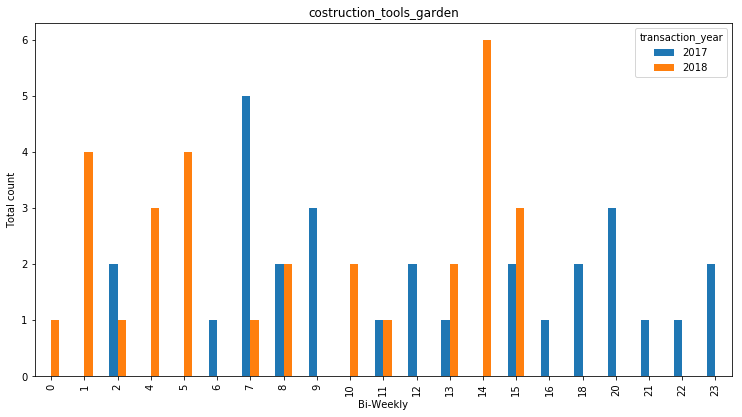

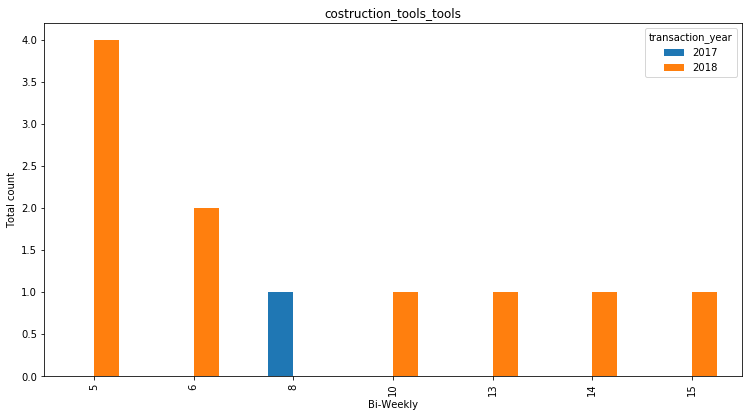

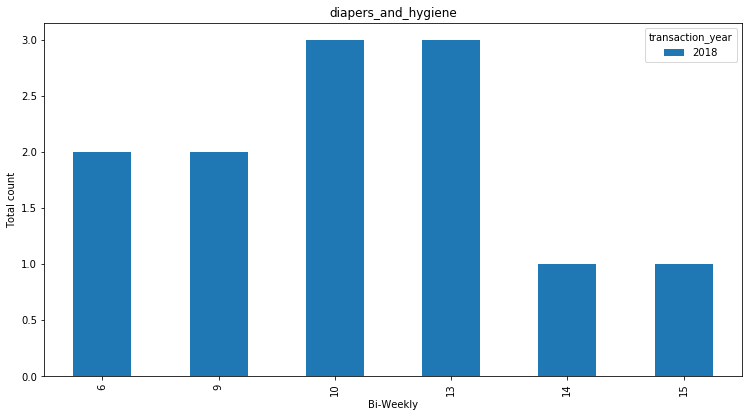

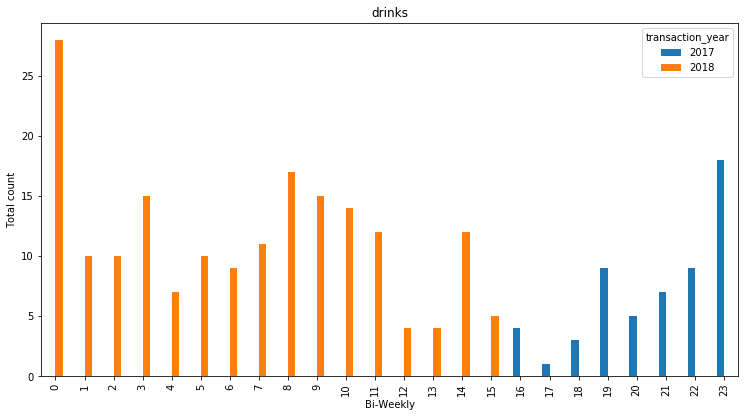

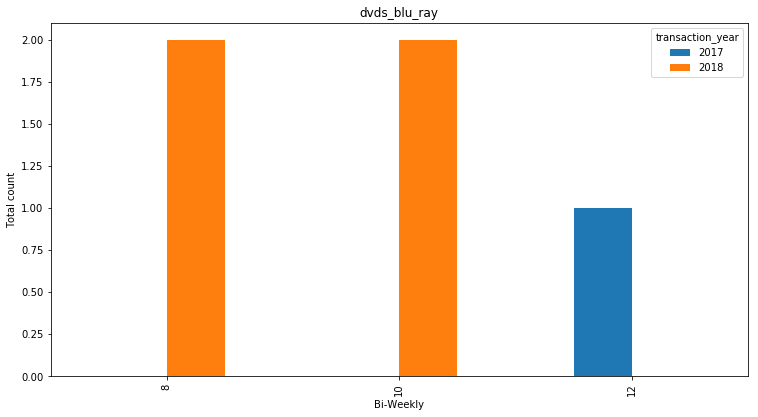

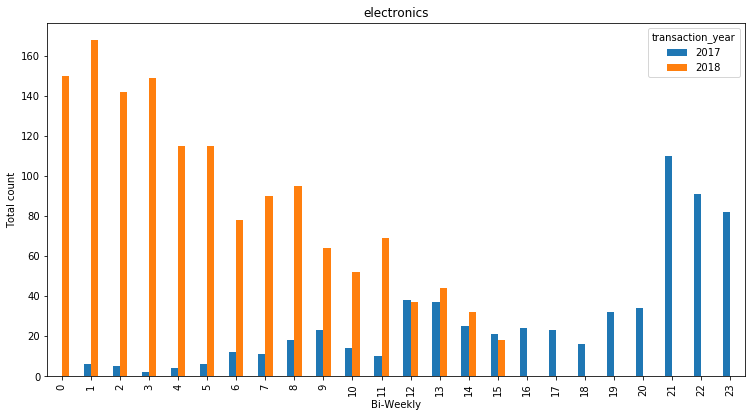

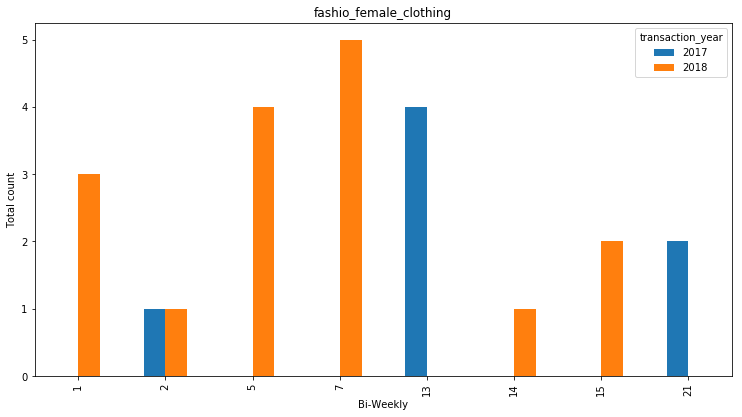

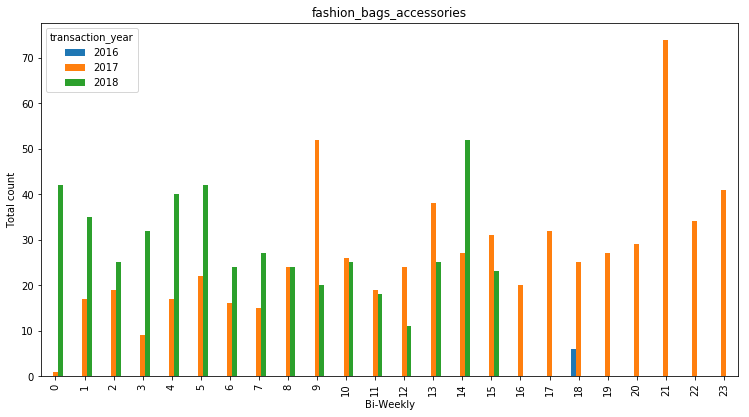

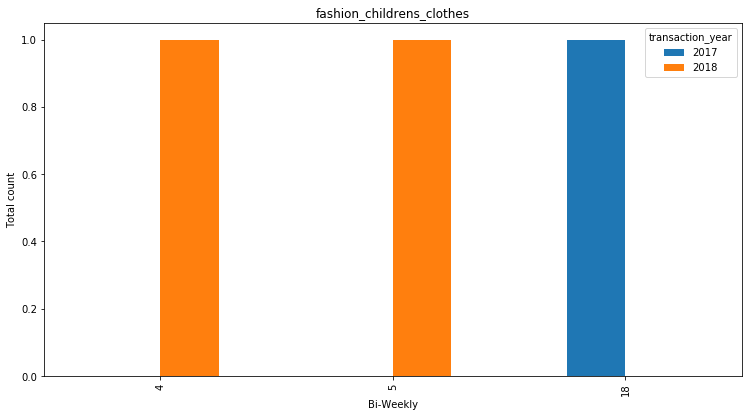

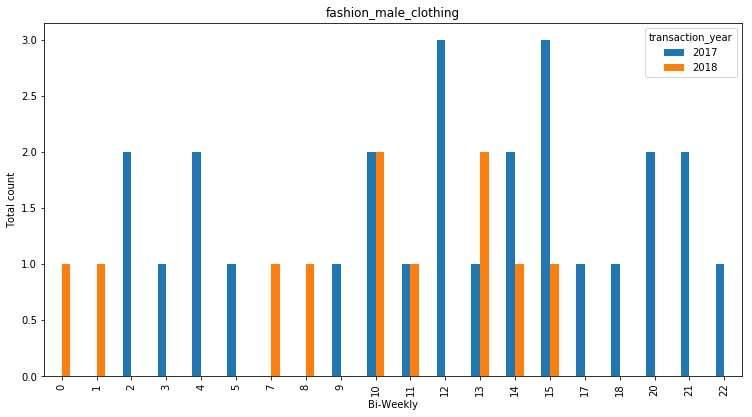

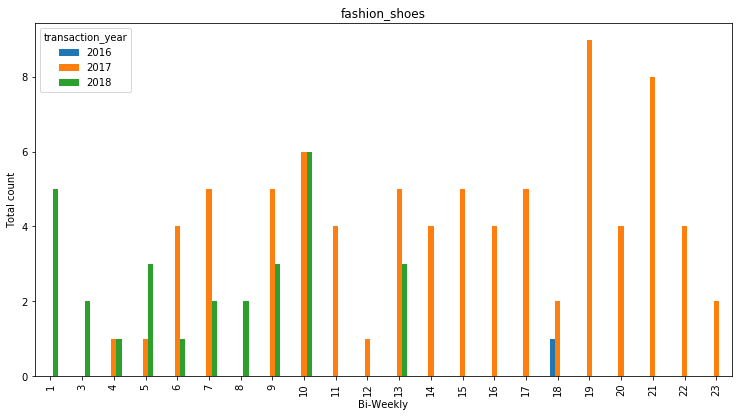

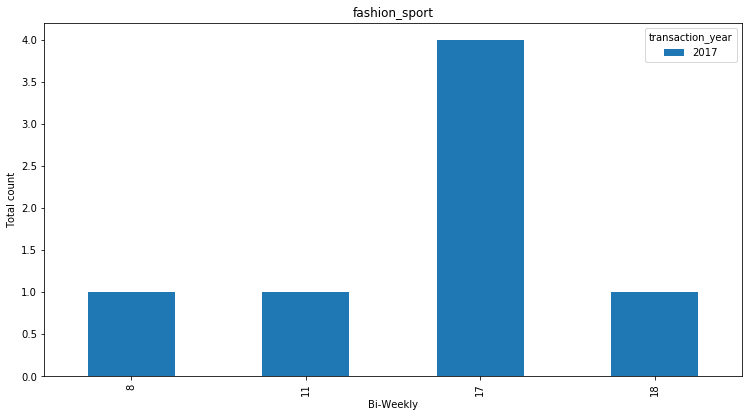

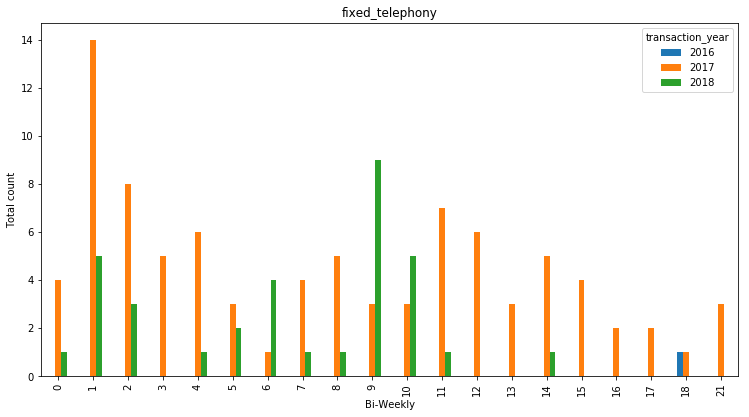

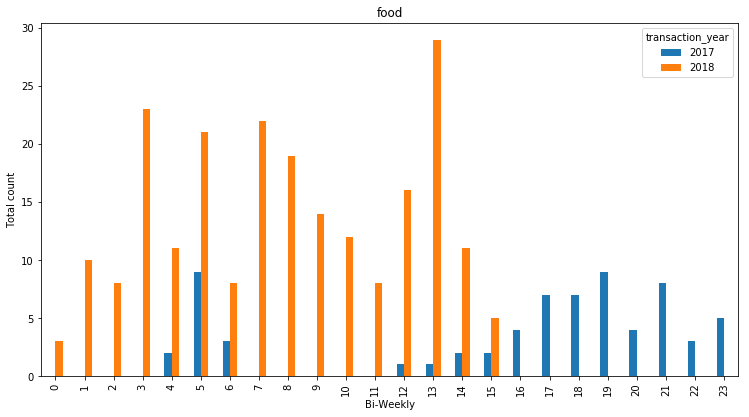

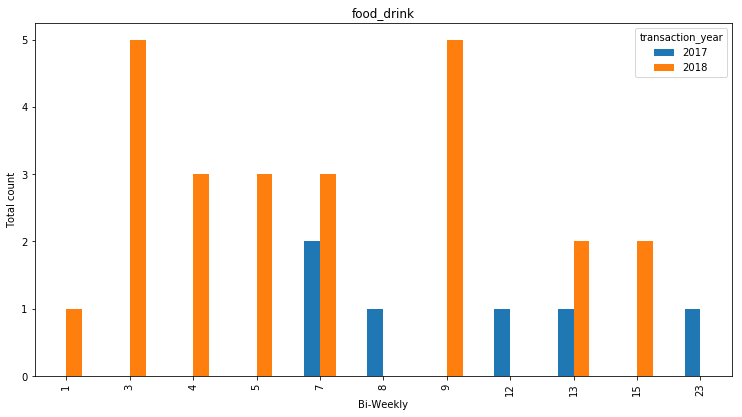

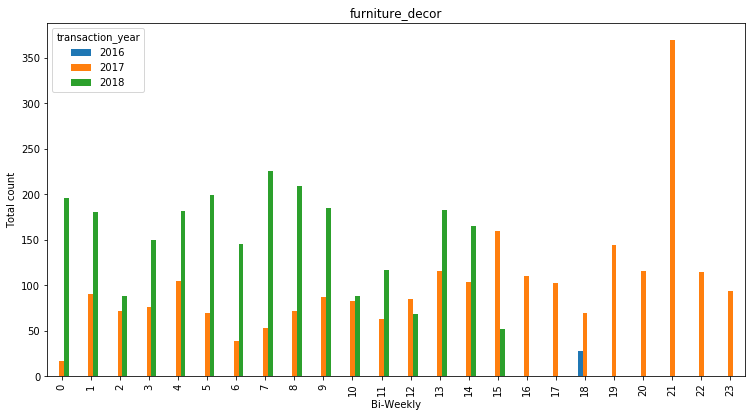

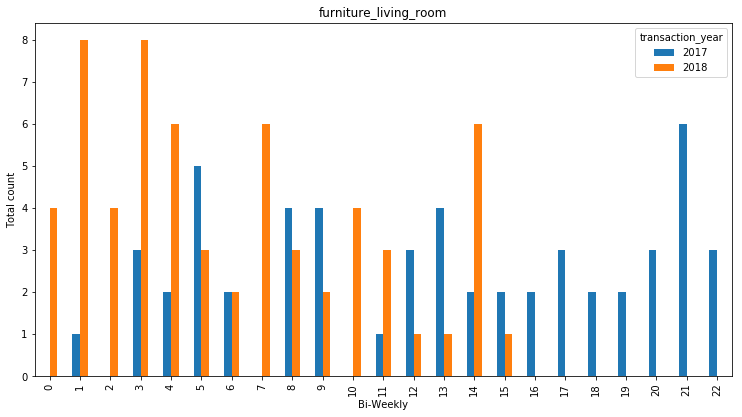

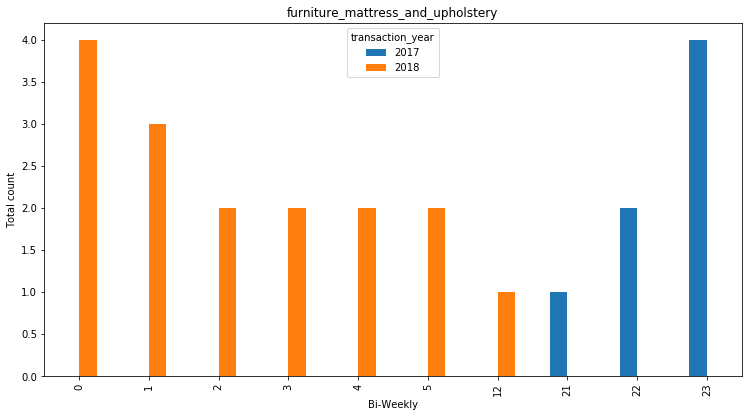

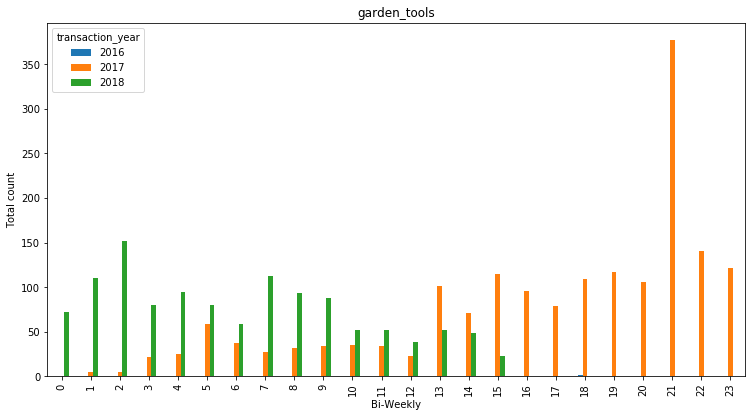

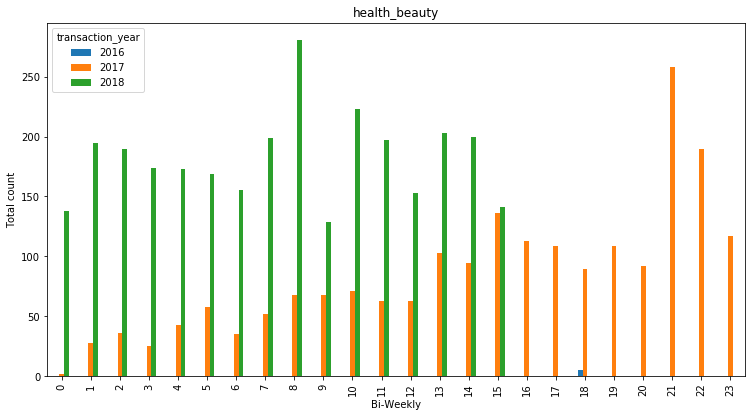

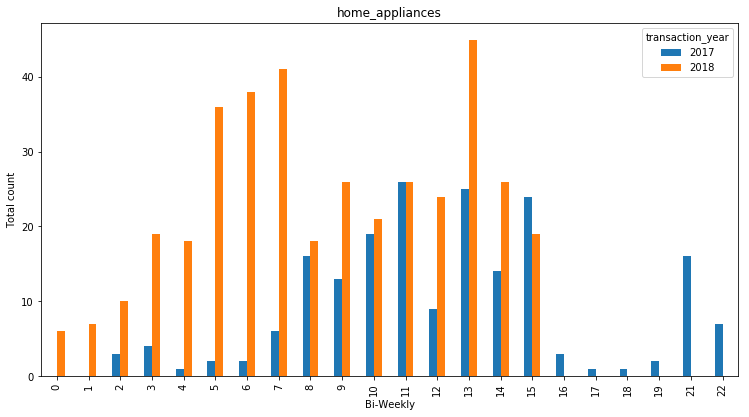

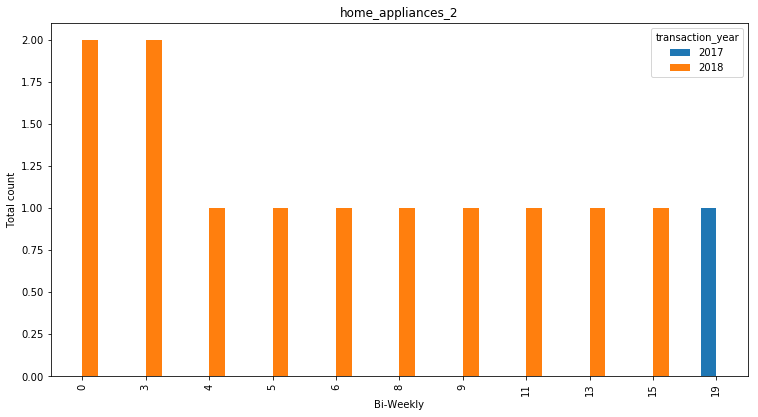

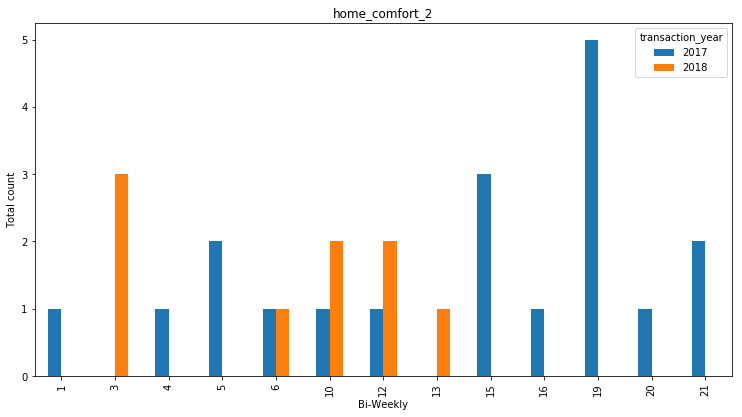

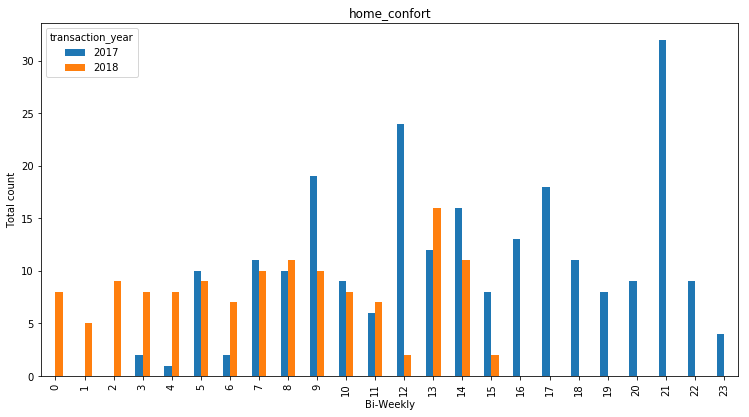

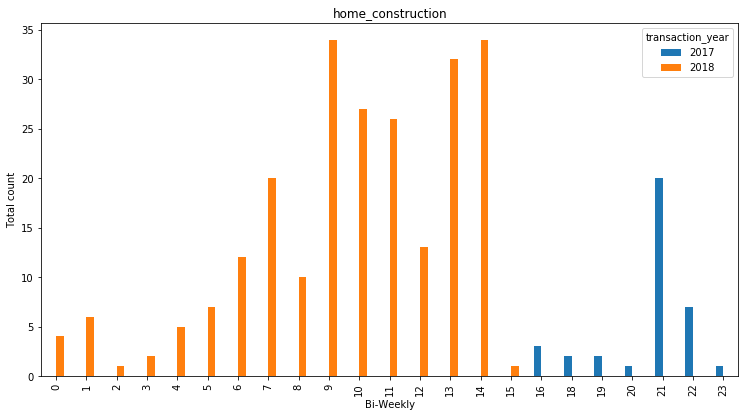

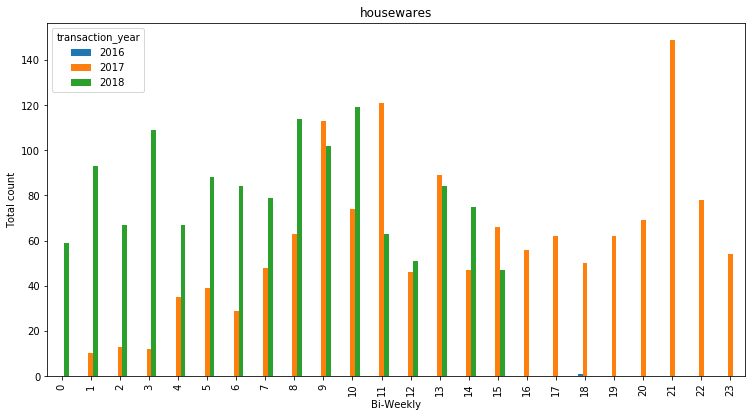

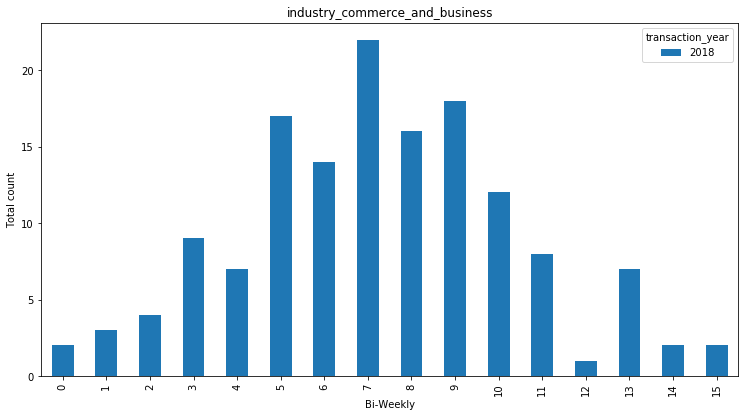

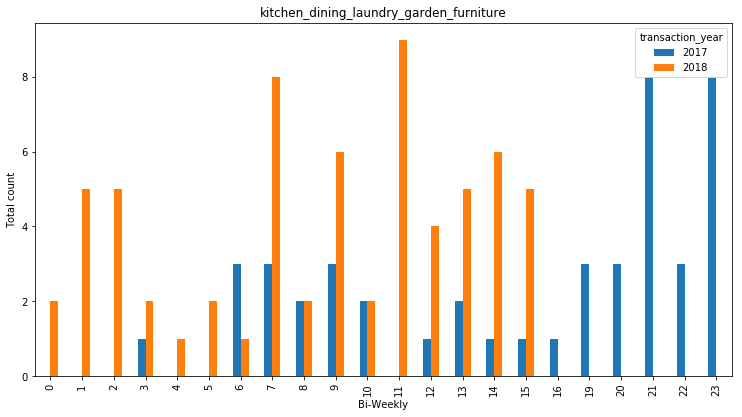

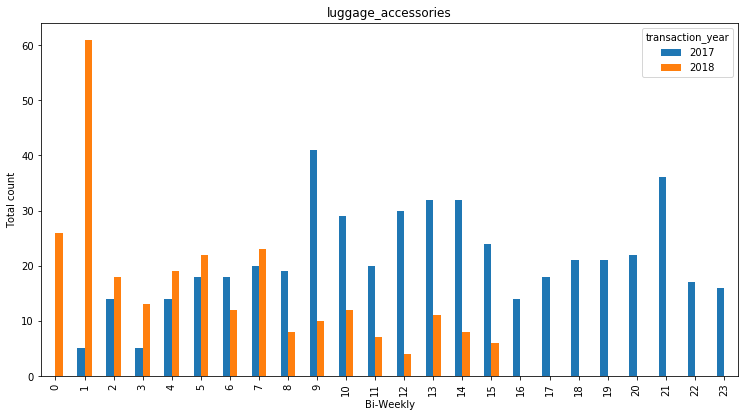

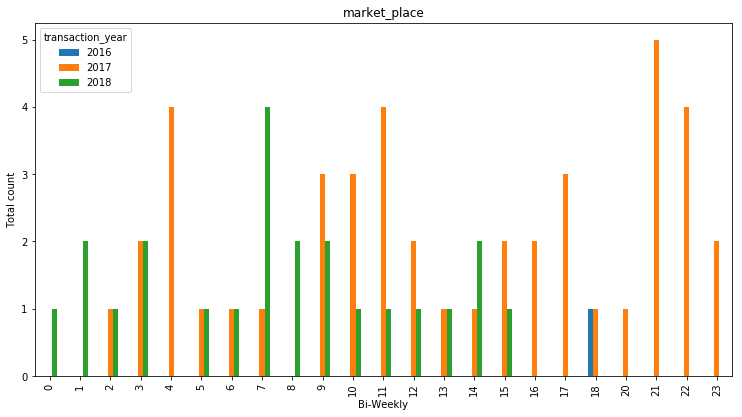

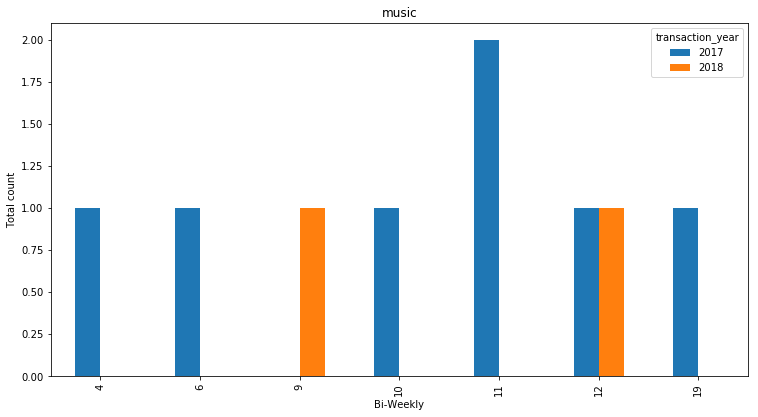

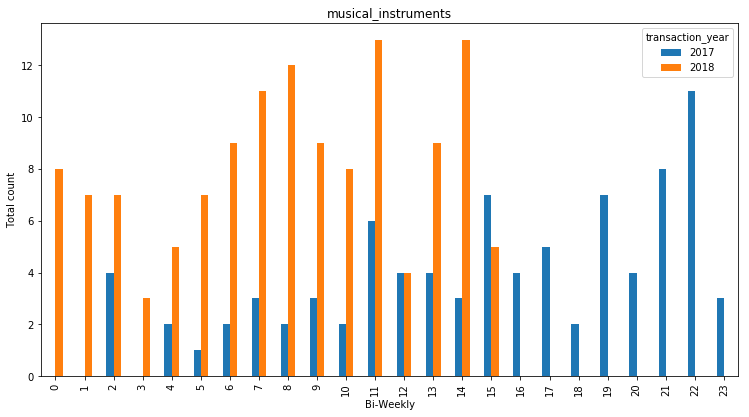

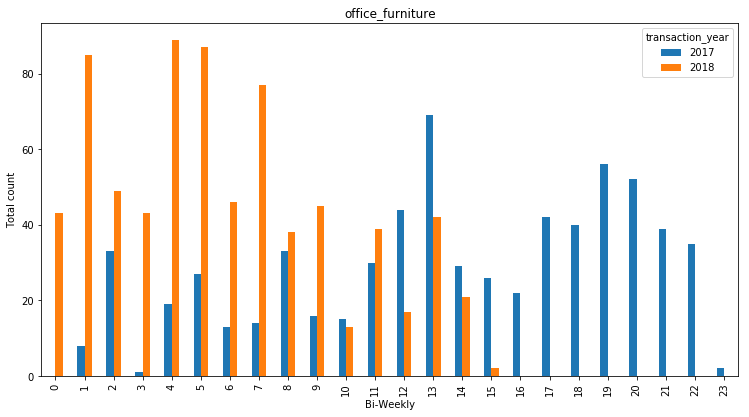

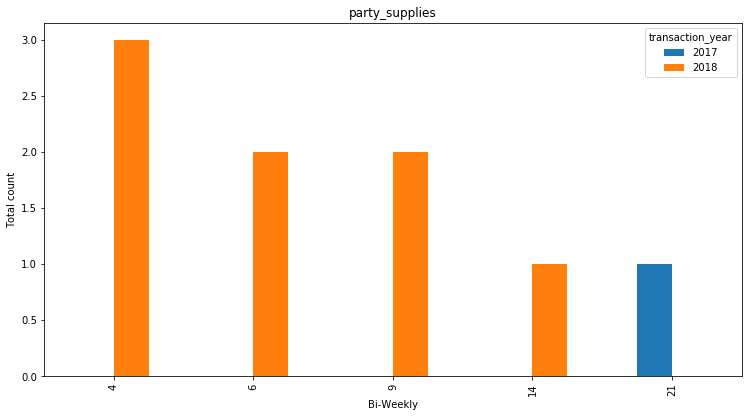

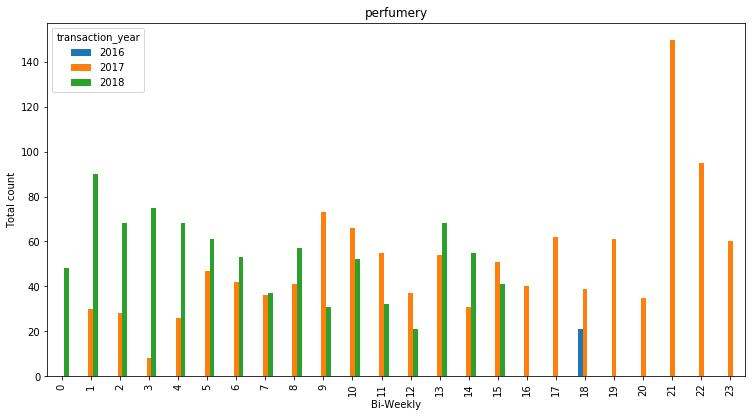

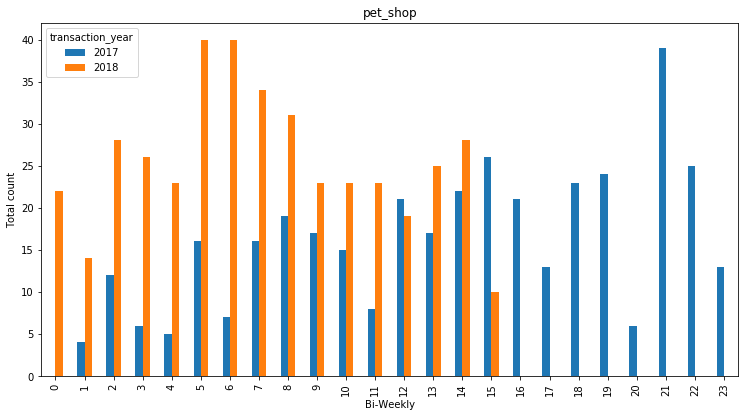

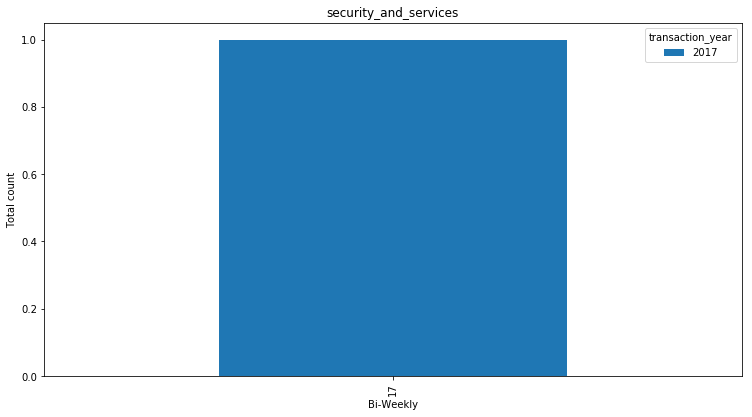

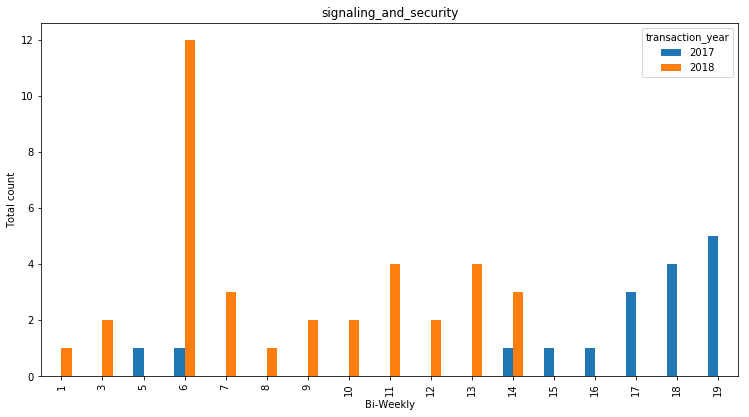

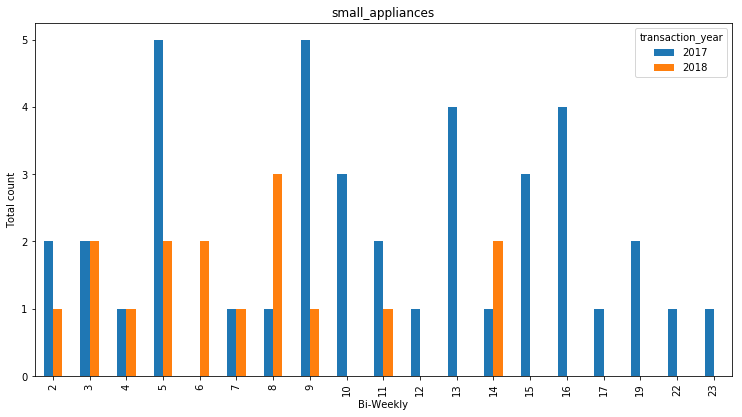

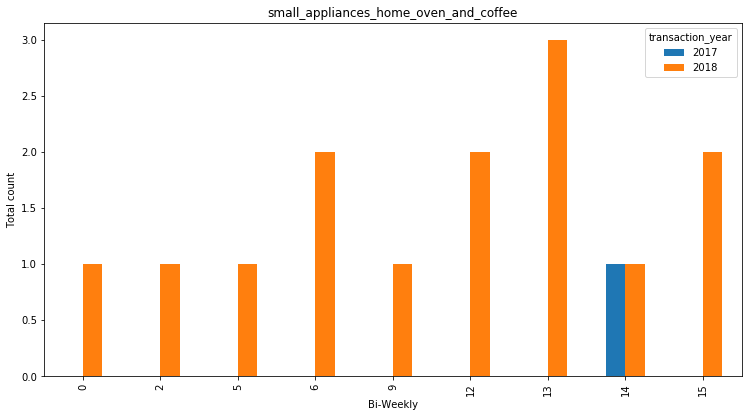

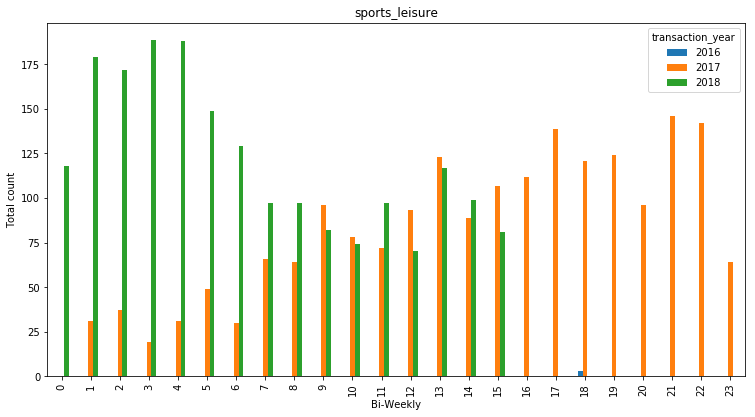

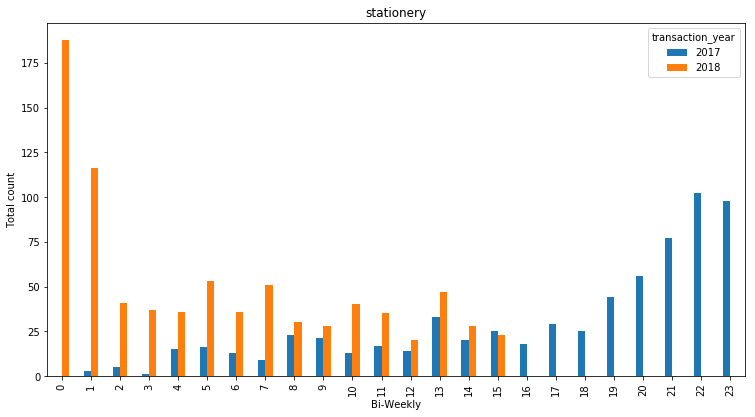

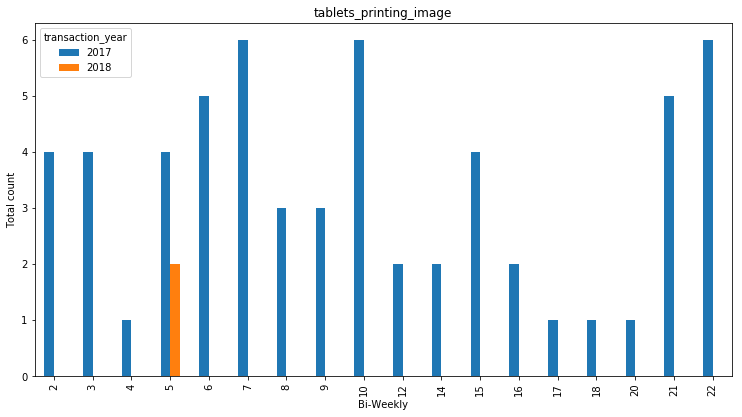

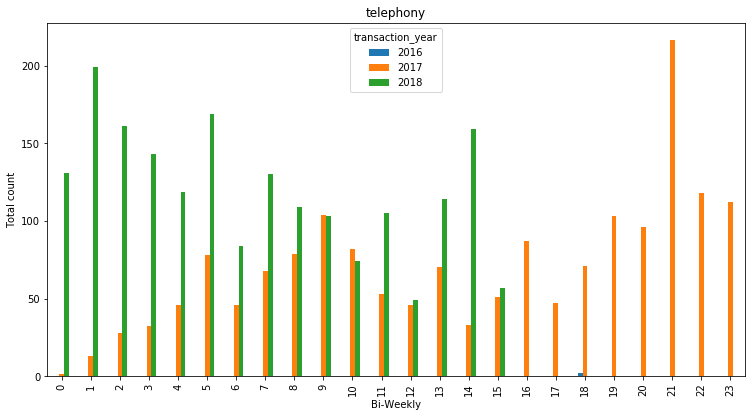

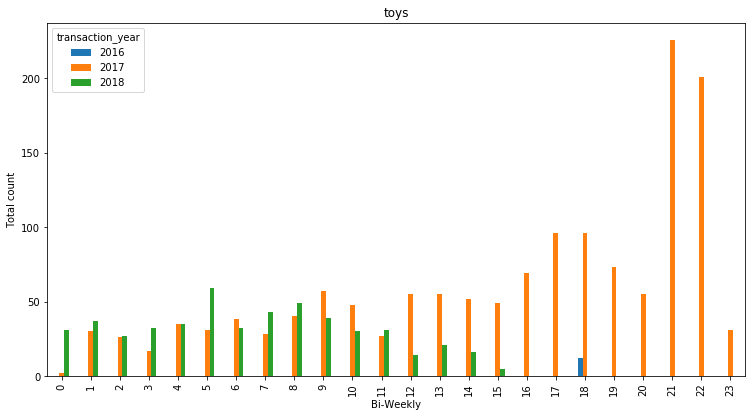

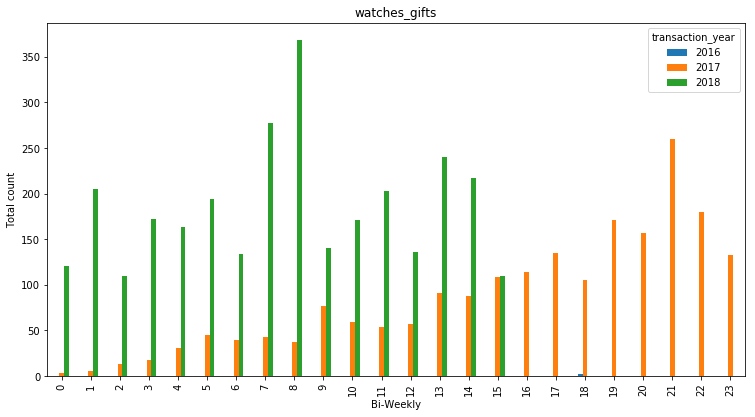

In [115]:
for i in range(len(list_of_prod_cat)):
    data_new_count_weekly[(data_new_count_weekly['product_category_name_english']==list_of_prod_cat_weekly[i])].pivot("Bi-Weekly", "transaction_year", "count").plot(kind='bar')
    fig = plt.gcf()
    fig.set_size_inches(12.5, 6.5)
    plt.title(list_of_prod_cat_weekly[i])
    plt.ylabel("Total count")
    plt.subplot()

In [116]:
#creating data frame of seller ids of our interest
data_under_observation=data_new[data_new['seller_id'].isin(list_of_Sellers)]


data_under_observation_count=data_under_observation.groupby(['seller_id','product_category_name_english','transaction_year','transaction_month']).size().reset_index(name='count')
data_under_observation_count.to_csv('../FeatureEng/data_under_observation_count.csv', sep=',')
print(data_under_observation_count)

                            seller_id product_category_name_english  \
0    1025f0e2d44d7041d6cf58b6550e0bfa     construction_tools_lights   
1    1025f0e2d44d7041d6cf58b6550e0bfa     construction_tools_lights   
2    1025f0e2d44d7041d6cf58b6550e0bfa     construction_tools_lights   
3    1025f0e2d44d7041d6cf58b6550e0bfa     construction_tools_lights   
4    1025f0e2d44d7041d6cf58b6550e0bfa     construction_tools_lights   
5    1025f0e2d44d7041d6cf58b6550e0bfa     construction_tools_lights   
6    1025f0e2d44d7041d6cf58b6550e0bfa     construction_tools_lights   
7    1025f0e2d44d7041d6cf58b6550e0bfa     construction_tools_lights   
8    1025f0e2d44d7041d6cf58b6550e0bfa     construction_tools_lights   
9    1025f0e2d44d7041d6cf58b6550e0bfa     construction_tools_lights   
10   1025f0e2d44d7041d6cf58b6550e0bfa     construction_tools_lights   
11   1025f0e2d44d7041d6cf58b6550e0bfa     construction_tools_lights   
12   1025f0e2d44d7041d6cf58b6550e0bfa     construction_tools_lights   
13   1

In [117]:
## Repeating the same for Bi-Weekly


data_under_observation_count_weekly=data_under_observation.groupby(['seller_id','product_category_name_english','transaction_year','Bi-Weekly']).size().reset_index(name='count')
print(data_under_observation_count_weekly)


                             seller_id product_category_name_english  \
0     1025f0e2d44d7041d6cf58b6550e0bfa     construction_tools_lights   
1     1025f0e2d44d7041d6cf58b6550e0bfa     construction_tools_lights   
2     1025f0e2d44d7041d6cf58b6550e0bfa     construction_tools_lights   
3     1025f0e2d44d7041d6cf58b6550e0bfa     construction_tools_lights   
4     1025f0e2d44d7041d6cf58b6550e0bfa     construction_tools_lights   
5     1025f0e2d44d7041d6cf58b6550e0bfa     construction_tools_lights   
6     1025f0e2d44d7041d6cf58b6550e0bfa     construction_tools_lights   
7     1025f0e2d44d7041d6cf58b6550e0bfa     construction_tools_lights   
8     1025f0e2d44d7041d6cf58b6550e0bfa     construction_tools_lights   
9     1025f0e2d44d7041d6cf58b6550e0bfa     construction_tools_lights   
10    1025f0e2d44d7041d6cf58b6550e0bfa     construction_tools_lights   
11    1025f0e2d44d7041d6cf58b6550e0bfa     construction_tools_lights   
12    1025f0e2d44d7041d6cf58b6550e0bfa     construction_tools_li

In [118]:
def seller_monthly_transaction_count(seller_id,product_category):
    seller = data_new[(data_new['seller_id']==seller_id)]
    seller_count = seller.groupby(['product_category_name_english','transaction_year','transaction_month']).size().reset_index(name='count')
    #graph for 2018

    month=(seller_count[(seller_count['transaction_year']==2018) & (seller_count['product_category_name_english']== product_category)]['transaction_month'])
    count=(seller_count[(seller_count['transaction_year']==2018) & (seller_count['product_category_name_english']==product_category)]['count'])
    
    if not count.empty:
        plt.bar(month, count, color="blue")
        plt.title('Counts of product sold in 2018')
        plt.xlabel('Month')
        plt.ylabel('Count of Product sold')
        plt.show()
    
    #graph for 2017

    #seller_count=seller.groupby(['product_category_name_english','transaction_year','transaction_month']).size().reset_index(name='count')
    month=(seller_count[(seller_count['transaction_year']==2017) & (seller_count['product_category_name_english']== product_category)]['transaction_month'])
    count=(seller_count[(seller_count['transaction_year']==2017) & (seller_count['product_category_name_english']==product_category)]['count'])
    
    if not count.empty:
        plt.bar(month, count, color="blue")
        plt.title('Counts of products sold in 2017')
        plt.xlabel('Month')
        plt.ylabel('Count of Product sold')
        plt.show()

In [119]:
def seller_biweekly_transaction_count(seller_id,product_category):
    seller = data_new[(data_new['seller_id']==seller_id)]
    seller_count = seller.groupby(['product_category_name_english','transaction_year','Bi-Weekly']).size().reset_index(name='count')
    
    #graph for 2018
    
    ## The following three lines are designed to help in plotting for bi-weekly data 
    bi_week = ['Jan_1','Jan_2','Feb_1','Feb_2','Mar_1','Mar_2','Apr_1','Apr_2','May_1','May_2','June_1','June_2','July_1','July_2','Aug_1','Aug_2','Sep_1','Sep_2','Oct_1','Oct_2','Nov_1','Nov_2','Dec_1','Dec_2']
    bi_weekly=(seller_count[(seller_count['transaction_year']==2018) & (seller_count['product_category_name_english']== product_category)]['Bi-Weekly'])
    count=(seller_count[(seller_count['transaction_year']==2018) & (seller_count['product_category_name_english']==product_category)]['count'])
    
    fig = plt.gcf()
    fig.set_size_inches(12.5, 6.5)
    #x = bi_week[min(bi_weekly):max(bi_weekly) + 1]
    x = []
    for i in bi_weekly:
        x.append(bi_week[i])
    
    if not count.empty:
        plt.bar(x, count, color="blue")
        plt.title('Counts of product sold in 2018')
        plt.xlabel('Bi_week')
        plt.ylabel('Count of Product sold')
        plt.show()
    
    #graph for 2017

    #seller_count=seller.groupby(['product_category_name_english','transaction_year','Bi-Weekly']).size().reset_index(name='count')
    bi_weekly=(seller_count[(seller_count['transaction_year']==2017) & (seller_count['product_category_name_english']== product_category)]['Bi-Weekly'])
    count=(seller_count[(seller_count['transaction_year']==2017) & (seller_count['product_category_name_english']==product_category)]['count'])
    
    x = []
    for i in bi_weekly:
        x.append(bi_week[i])

    if not count.empty:
        fig = plt.gcf()
        fig.set_size_inches(12.5, 6.5)
        plt.bar(x, count, color="blue")
        plt.title('Counts of products sold in 2017')
        plt.xlabel('Bi_Week')
        plt.ylabel('Count of Product sold')
        plt.show()

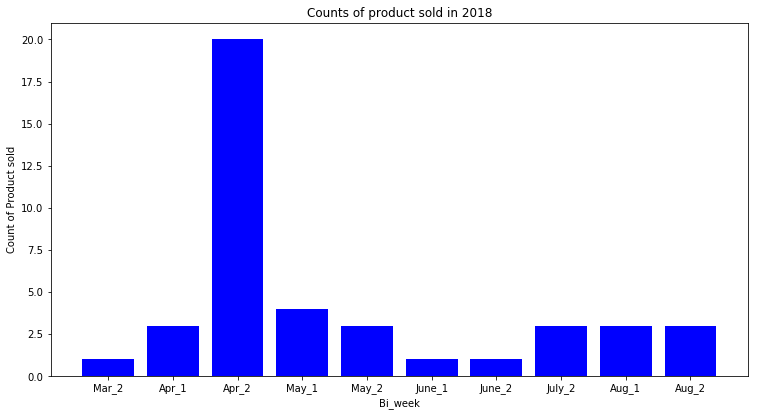

In [120]:
seller_biweekly_transaction_count('1f50f920176fa81dab994f9023523100','baby')

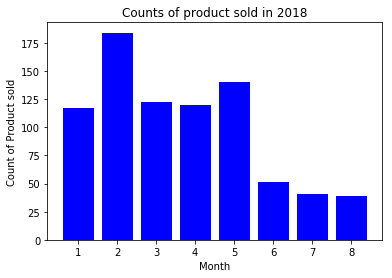

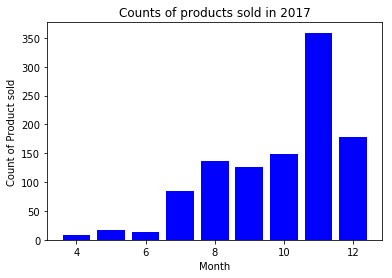

In [121]:
seller_monthly_transaction_count('1f50f920176fa81dab994f9023523100','garden_tools')

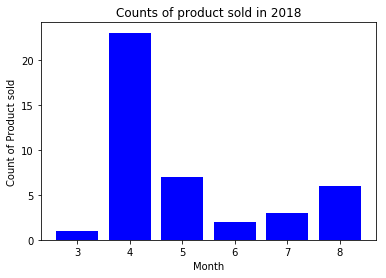

In [122]:
seller_monthly_transaction_count('1f50f920176fa81dab994f9023523100','baby')

In [123]:
def seller_biweekly_transaction_count_line_graph(seller_id,product_category):
    seller = data_new[(data_new['seller_id']==seller_id)]
    seller_count = seller.groupby(['product_category_name_english','transaction_year','Bi-Weekly']).size().reset_index(name='count')
    #print("Bi_weekly seller count for the particular seller:")
    
    #graph for 2018
    
    bi_week = ['Jan_1_17','Jan_2_17','Feb_1_17','Feb_2_17','Mar_1_17','Mar_2_17','Apr_1_17','Apr_2_17','May_1_17','May_2_17','June_1_17','June_2_17','July_1_17','July_2_17','Aug_1_17','Aug_2_17','Sep_1_17','Sep_2_17','Oct_1_17','Oct_2_17','Nov_1_17','Nov_2_17','Dec_1_17','Dec_2_17','Jan_1_18','Jan_2_18','Feb_1_18','Feb_2_18','Mar_1_18','Mar_2_18','Apr_1_18','Apr_2_18','May_1_18','May_2_18','June_1_18','June_2_18','July_1_18','July_2_18','Aug_1_18','Aug_2_18','Sep_1_18','Sep_2_18','Oct_1_18','Oct_2_18','Nov_1_18','Nov_2_18','Dec_1_18','Dec_2_18']
    bi_weekly= 24*(seller_count[(seller_count['product_category_name_english']== product_category)]['transaction_year'] - 2017) + seller_count[(seller_count['product_category_name_english']== product_category)]['Bi-Weekly']
    count=(seller_count[seller_count['product_category_name_english']==product_category]['count'])
    
    plt.figure(dpi = 300)
    fig = plt.gcf()
    fig.set_size_inches(34.5, 12.5)
    #x = bi_week[min(bi_weekly):max(bi_weekly) + 1]
    x = []
    for i in bi_weekly:
        x.append(bi_week[i])
    
    if not count.empty:
        plt.plot(x,count, color="blue")
    
    ## uncomment next line to save this plot
    #plt.savefig("eg.jpeg",dpi = 450)

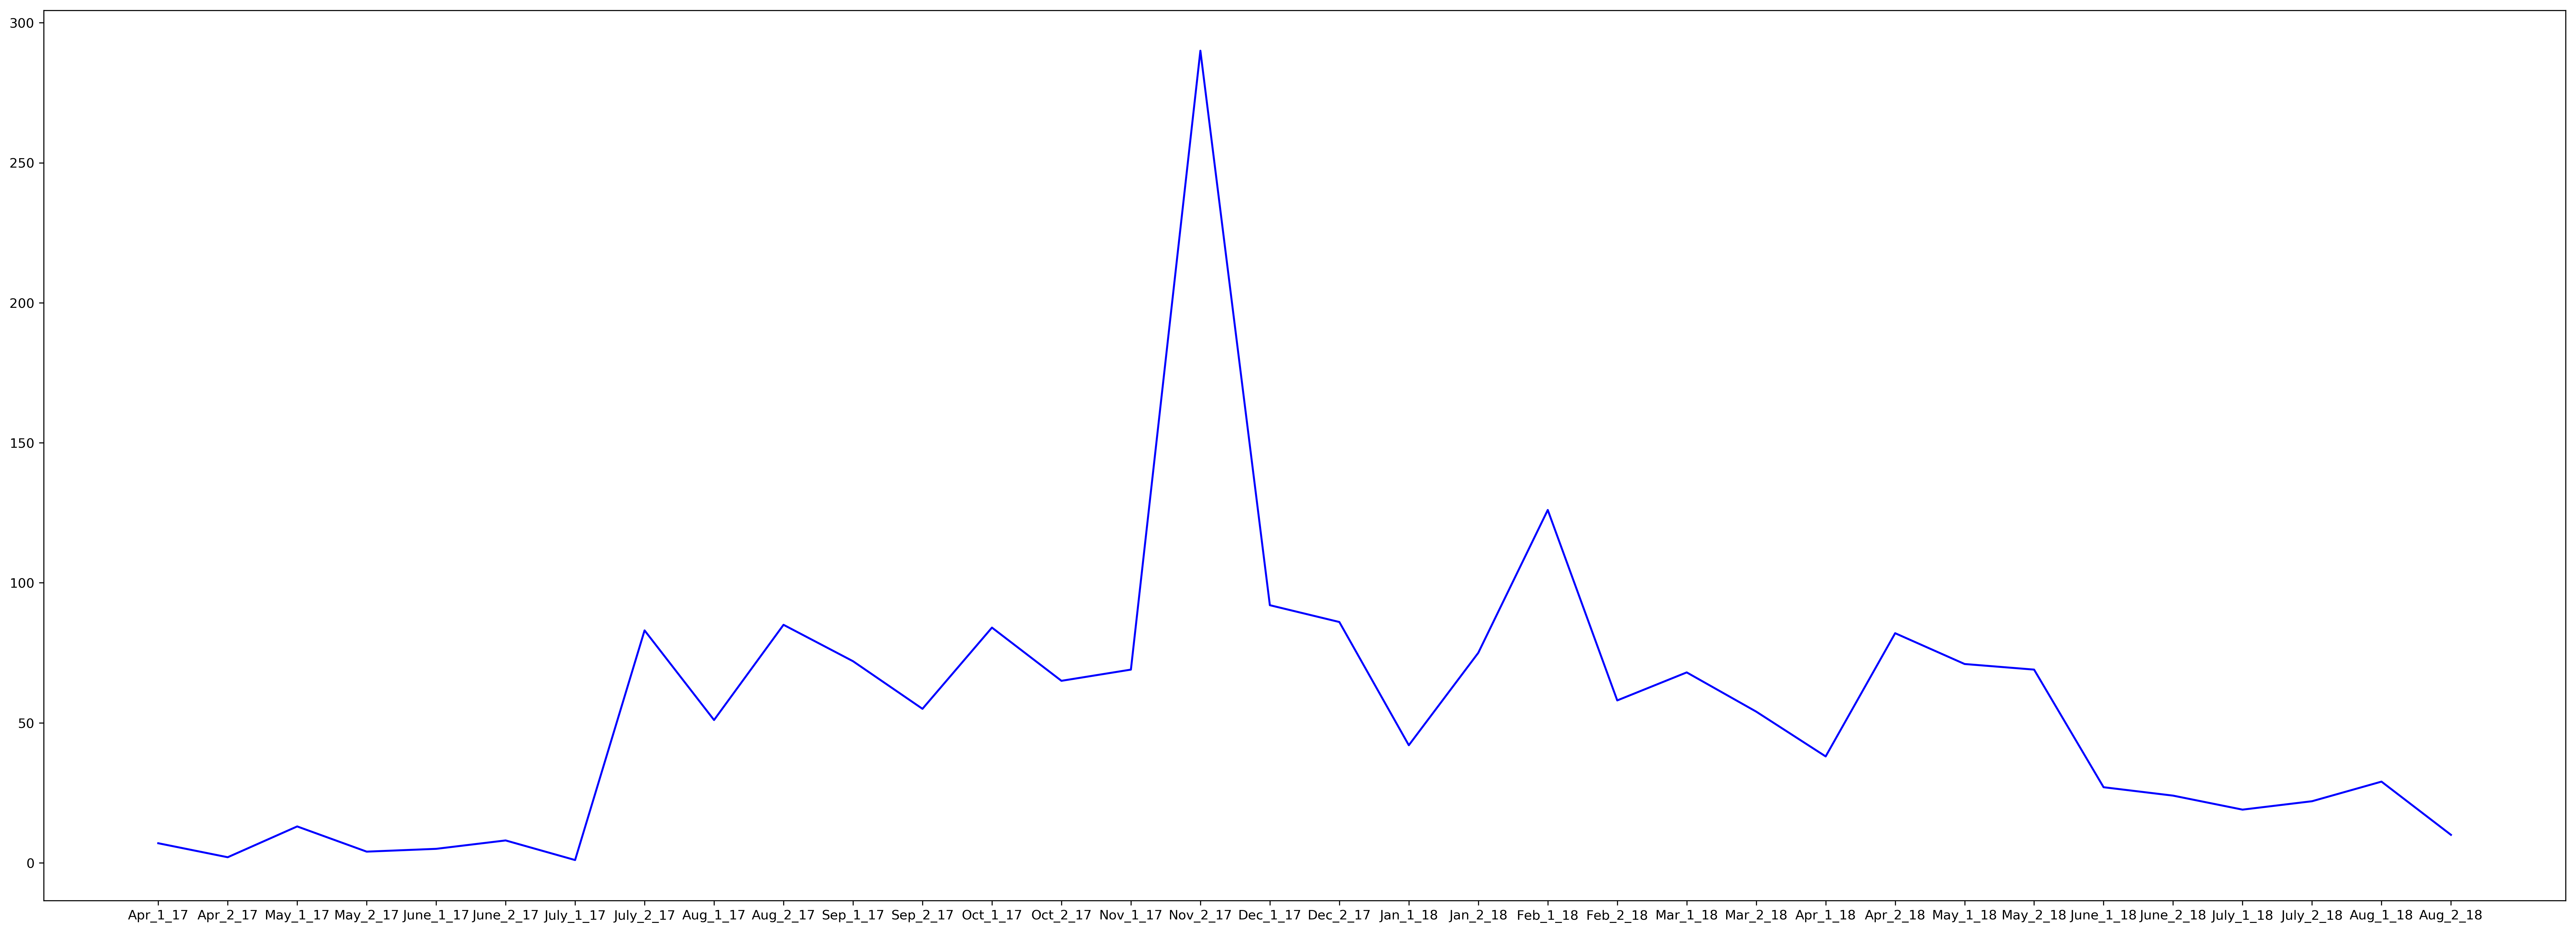

In [124]:
seller_biweekly_transaction_count_line_graph('1f50f920176fa81dab994f9023523100','garden_tools')

In [125]:
def seller_monthly_transaction_count_line_graph(seller_id,product_category):
    seller = data_new[(data_new['seller_id']==seller_id)]
    seller_count = seller.groupby(['product_category_name_english','transaction_year','transaction_month']).size().reset_index(name='count')
    #graph for 2018

    month_year=seller_count[seller_count['product_category_name_english']== product_category]['transaction_year'].astype(str) +"_" + seller_count[(seller_count['product_category_name_english']== product_category)]['transaction_month'].astype(str)
    count=(seller_count[seller_count['product_category_name_english']==product_category]['count'])
    
    fig = plt.gcf()
    fig.set_size_inches(16.5, 6.5)
    if not count.empty:
        plt.plot(month_year, count, color="blue")
        plt.title('Counts of product sold in 2018')
        plt.xlabel('Month and Year')
        plt.ylabel('Count of Product sold')
        plt.show()

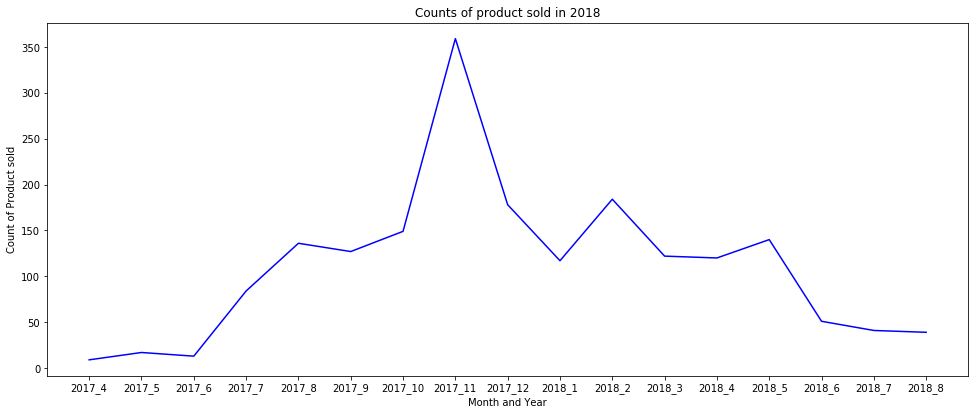

In [126]:
seller_monthly_transaction_count_line_graph('1f50f920176fa81dab994f9023523100','garden_tools')